# **🗂️ Packages & Funcs**

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 문제
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 17,8

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np

In [3]:
# MultiIndex 컬럼 평탄화 하는 함수 
def flat_cols(df):
    df.columns = [' , '.join(x) for x in df.columns.to_flat_index()]
    return df

# **📌 대구 교통 사고 피해 예측 AI 경진대회 Baseline Code**

## **Fixed Random Seed**  

seed 값에 의해 동일한 코드를 사용해도 결과가 다를 수 있기에, 동일한 결과를 위해 seed 값을 고정시킵니다

In [4]:
import os
import random
import numpy as np

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

## **데이터 불러오기 및 상위행 확인**  

train.csv, test.csv 파일을 로드하여 상위행을 출력해 봅시다

In [5]:
import pandas as pd
from datetime import datetime

train = pd.read_csv('/Users/euijinlee/KDT_DATA/Project_1/data/train.csv')
test = pd.read_csv('/Users/euijinlee/KDT_DATA/Project_1/data/test.csv')

display(train.head())
display(test.tail())

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
10958,ACCIDENT_50567,2022-12-31 18,토요일,맑음,대구광역시 남구 대명동,단일로 - 터널,건조,차대차
10959,ACCIDENT_50568,2022-12-31 18,토요일,맑음,대구광역시 수성구 시지동,단일로 - 기타,건조,차대차
10960,ACCIDENT_50569,2022-12-31 20,토요일,맑음,대구광역시 수성구 연호동,단일로 - 기타,건조,차대차
10961,ACCIDENT_50570,2022-12-31 20,토요일,맑음,대구광역시 수성구 범물동,교차로 - 교차로부근,건조,차대차
10962,ACCIDENT_50571,2022-12-31 21,토요일,맑음,대구광역시 동구 효목동,교차로 - 교차로부근,건조,차대차


## **train, test 데이터 기간 확인하기**  

학습(train) 데이터의 기간과 예측 대상이 되는 test 데이터의 기간을 살펴 봅니다

In [6]:
display(f"train : {train.iloc[0]['사고일시']} ~ {train.iloc[-1]['사고일시']}")
display(f"test : {test.iloc[0]['사고일시']} ~ {test.iloc[-1]['사고일시']}")

'train : 2019-01-01 00 ~ 2021-12-31 23'

'test : 2022-01-01 01 ~ 2022-12-31 21'

### Data Info

In [7]:
#'사고일시' 데이터 타입을 object -> datetime으로  바꾸기
train['사고일시'] = pd.to_datetime(train['사고일시'])
test['사고일시'] = pd.to_datetime(test['사고일시'])

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           39609 non-null  object        
 1   사고일시         39609 non-null  datetime64[ns]
 2   요일           39609 non-null  object        
 3   기상상태         39609 non-null  object        
 4   시군구          39609 non-null  object        
 5   도로형태         39609 non-null  object        
 6   노면상태         39609 non-null  object        
 7   사고유형         39609 non-null  object        
 8   사고유형 - 세부분류  39609 non-null  object        
 9   법규위반         39609 non-null  object        
 10  가해운전자 차종     39609 non-null  object        
 11  가해운전자 성별     39609 non-null  object        
 12  가해운전자 연령     39609 non-null  object        
 13  가해운전자 상해정도   39609 non-null  object        
 14  피해운전자 차종     38618 non-null  object        
 15  피해운전자 성별     38618 non-null  object        
 16  피해운전

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      10963 non-null  object        
 1   사고일시    10963 non-null  datetime64[ns]
 2   요일      10963 non-null  object        
 3   기상상태    10963 non-null  object        
 4   시군구     10963 non-null  object        
 5   도로형태    10963 non-null  object        
 6   노면상태    10963 non-null  object        
 7   사고유형    10963 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 685.3+ KB


### - train과 test 데이터셋의  컬럼 수가 서로 다름
    - ID, 사고일시, 요일, 기상상태, 시군구, 도로형태, 노면상태, 사고유형

In [10]:
display(train['요일'].unique())
display(test['요일'].unique())

array(['화요일', '수요일', '목요일', '금요일', '토요일', '일요일', '월요일'], dtype=object)

array(['토요일', '일요일', '월요일', '화요일', '수요일', '목요일', '금요일'], dtype=object)

In [11]:
display(train['기상상태'].unique())
display(test['기상상태'].unique())

array(['맑음', '흐림', '기타', '비', '안개', '눈'], dtype=object)

array(['맑음', '흐림', '기타', '비', '눈'], dtype=object)

***- test에는 기상상태-'안개' 없음***

In [12]:
display(train['시군구'].unique())
display(test['시군구'].unique())

array(['대구광역시 중구 대신동', '대구광역시 달서구 감삼동', '대구광역시 수성구 두산동', '대구광역시 북구 복현동',
       '대구광역시 동구 신암동', '대구광역시 수성구 지산동', '대구광역시 달서구 상인동', '대구광역시 북구 태전동',
       '대구광역시 동구 지묘동', '대구광역시 서구 평리동', '대구광역시 동구 신기동', '대구광역시 서구 상리동',
       '대구광역시 달서구 월성동', '대구광역시 수성구 황금동', '대구광역시 북구 구암동', '대구광역시 동구 신천동',
       '대구광역시 수성구 만촌동', '대구광역시 중구 남산동', '대구광역시 서구 비산동', '대구광역시 북구 침산동',
       '대구광역시 달서구 두류동', '대구광역시 수성구 신매동', '대구광역시 달서구 대곡동', '대구광역시 달성군 유가읍',
       '대구광역시 달성군 논공읍', '대구광역시 동구 율하동', '대구광역시 수성구 시지동', '대구광역시 동구 봉무동',
       '대구광역시 달성군 다사읍', '대구광역시 중구 동산동', '대구광역시 서구 이현동', '대구광역시 남구 이천동',
       '대구광역시 수성구 수성동4가', '대구광역시 북구 노원동3가', '대구광역시 북구 서변동',
       '대구광역시 북구 관음동', '대구광역시 북구 학정동', '대구광역시 수성구 파동', '대구광역시 수성구 상동',
       '대구광역시 달서구 이곡동', '대구광역시 동구 효목동', '대구광역시 북구 읍내동', '대구광역시 중구 남성로',
       '대구광역시 달서구 죽전동', '대구광역시 남구 대명동', '대구광역시 북구 동천동', '대구광역시 동구 지저동',
       '대구광역시 북구 사수동', '대구광역시 중구 덕산동', '대구광역시 달서구 본리동', '대구광역시 동구 용계동',
       '대구광역시 수성구 범어동', '대구광역시 달서구 신당동', '대구광역시 달서구 성당동', '대구광역시 달서구 용산

array(['대구광역시 수성구 상동', '대구광역시 수성구 지산동', '대구광역시 수성구 수성동2가',
       '대구광역시 수성구 신매동', '대구광역시 달서구 감삼동', '대구광역시 중구 달성동', '대구광역시 동구 신암동',
       '대구광역시 서구 평리동', '대구광역시 달서구 송현동', '대구광역시 달서구 두류동', '대구광역시 북구 매천동',
       '대구광역시 달서구 상인동', '대구광역시 달서구 진천동', '대구광역시 중구 삼덕동1가', '대구광역시 중구 동문동',
       '대구광역시 달서구 성당동', '대구광역시 북구 동천동', '대구광역시 북구 태전동', '대구광역시 남구 대명동',
       '대구광역시 달서구 대곡동', '대구광역시 북구 복현동', '대구광역시 달서구 본리동', '대구광역시 수성구 범어동',
       '대구광역시 수성구 황금동', '대구광역시 달서구 호산동', '대구광역시 중구 동인동1가', '대구광역시 남구 이천동',
       '대구광역시 달성군 유가읍', '대구광역시 달서구 월암동', '대구광역시 북구 동호동', '대구광역시 달서구 죽전동',
       '대구광역시 달서구 본동', '대구광역시 달서구 도원동', '대구광역시 달성군 다사읍', '대구광역시 달서구 용산동',
       '대구광역시 달서구 유천동', '대구광역시 북구 산격동', '대구광역시 달서구 파호동', '대구광역시 동구 효목동',
       '대구광역시 북구 고성동3가', '대구광역시 중구 남산동', '대구광역시 동구 지묘동', '대구광역시 달성군 하빈면',
       '대구광역시 서구 내당동', '대구광역시 수성구 매호동', '대구광역시 북구 침산동', '대구광역시 동구 신천동',
       '대구광역시 동구 방촌동', '대구광역시 수성구 두산동', '대구광역시 달성군 구지면', '대구광역시 달서구 대천동',
       '대구광역시 달서구 월성동', '대구광역시 달성군 화원읍', '대구광역시 북구 고성동2가',

In [13]:
display(train['도로형태'].unique())
display(test['도로형태'].unique())

array(['단일로 - 기타', '교차로 - 교차로안', '기타 - 기타', '단일로 - 터널', '단일로 - 지하차도(도로)내',
       '단일로 - 교량', '교차로 - 교차로횡단보도내', '주차장 - 주차장', '교차로 - 교차로부근',
       '단일로 - 고가도로위', '미분류 - 미분류'], dtype=object)

array(['교차로 - 교차로안', '단일로 - 기타', '교차로 - 교차로횡단보도내', '교차로 - 교차로부근',
       '단일로 - 지하차도(도로)내', '기타 - 기타', '단일로 - 교량', '단일로 - 고가도로위',
       '주차장 - 주차장', '단일로 - 터널', '미분류 - 미분류'], dtype=object)

In [14]:
display(train['노면상태'].unique())
display(test['노면상태'].unique())

array(['건조', '젖음/습기', '서리/결빙', '기타', '침수', '적설'], dtype=object)

array(['건조', '젖음/습기', '서리/결빙', '기타', '침수', '적설'], dtype=object)

In [15]:
display(train['사고유형'].unique())
display(test['사고유형'].unique())

array(['차대사람', '차대차', '차량단독'], dtype=object)

array(['차대사람', '차대차', '차량단독'], dtype=object)

### 날짜 데이터 파싱하기

In [16]:
train['year'] = train.사고일시.dt.year
train['month'] = train.사고일시.dt.month
train['day'] = train.사고일시.dt.day
train['hour'] = train.사고일시.dt.hour

In [17]:
test['year'] = test.사고일시.dt.year
test['month'] = test.사고일시.dt.month
test['day'] = test.사고일시.dt.day
test['hour'] = test.사고일시.dt.hour

## **데이터 전처리**  

현재 '사고일시', '시군구', '도로형태' 컬럼은 반복되는 패턴으로 여러 정보를 포함하고 있습니다
이런 반복되는 패턴을 일반화하면 pandas에서 제공하는 str.extract를 통해 한 번에 추출 가능합니다  

## **파생 변수 생성 1 : 날짜, 시간정보 생성**

'사고일시' 컬럼으로 부터 연도, 월, 일, 시간 정보 추출 및 변환 합니다

In [18]:
import pandas as pd
from datetime import datetime

train_org = pd.read_csv('/Users/euijinlee/KDT_DATA/Project_1/data/train.csv')
test_org = pd.read_csv('/Users/euijinlee/KDT_DATA/Project_1/data/test.csv')

display(train_org.head())
display(test_org.tail())

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
10958,ACCIDENT_50567,2022-12-31 18,토요일,맑음,대구광역시 남구 대명동,단일로 - 터널,건조,차대차
10959,ACCIDENT_50568,2022-12-31 18,토요일,맑음,대구광역시 수성구 시지동,단일로 - 기타,건조,차대차
10960,ACCIDENT_50569,2022-12-31 20,토요일,맑음,대구광역시 수성구 연호동,단일로 - 기타,건조,차대차
10961,ACCIDENT_50570,2022-12-31 20,토요일,맑음,대구광역시 수성구 범물동,교차로 - 교차로부근,건조,차대차
10962,ACCIDENT_50571,2022-12-31 21,토요일,맑음,대구광역시 동구 효목동,교차로 - 교차로부근,건조,차대차


In [19]:
train_df = train_org.copy()
test_df = test_org.copy()

time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

train_df[['연', '월', '일', '시간']] = train_org['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric) # 추출된 문자열을 수치화해줍니다
train_df = train_df.drop(columns=['사고일시']) # 정보 추출이 완료된 '사고일시' 컬럼은 제거합니다

# 해당 과정을 test_x에 대해서도 반복해줍니다
test_df[['연', '월', '일', '시간']] = test_org['사고일시'].str.extract(time_pattern)
test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
test_df = test_df.drop(columns=['사고일시'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류',\n       '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',\n       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',\n       'ECLO', '연', '월', '일', '시간'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '연', '월', '일', '시간'], dtype='object')"

## **파생 변수 생성 2 : 공간(위치) 정보 생성**

'시군구' 컬럼으로부터 의미 있는 공산 정보를 추출 및 변환 합니다

In [20]:
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train_org['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test_org['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반',\n       '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',\n       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',\n       'ECLO', '연', '월', '일', '시간', '도시', '구', '동'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시',\n       '구', '동'],\n      dtype='object')"

## **파생 변수 추출 3 : 도로 형태 정보 추출**  

'도로형태' 컬럼은 '단일로 - 기타'와 같은 패턴으로 구성되어 있습니다. 이를 두종류의 독립된 정보로 보고 두개의 컬럼으로 분리하여 생성합니다.

In [21]:
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_org['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test_org['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',\n       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',\n       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '연',\n       '월', '일', '시간', '도시', '구', '동', '도로형태1', '도로형태2'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시', '구', '동',\n       '도로형태1', '도로형태2'],\n      dtype='object')"

In [22]:
train_df

,ID,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,...,ECLO,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,...,5,2019,1,1,0,대구광역시,중구,대신동,단일로,기타
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39세,...,3,2019,1,1,0,대구광역시,달서구,감삼동,단일로,기타
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,...,3,2019,1,1,1,대구광역시,수성구,두산동,단일로,기타
3,ACCIDENT_00003,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,49세,...,5,2019,1,1,2,대구광역시,북구,복현동,단일로,기타
4,ACCIDENT_00004,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,30세,...,3,2019,1,1,4,대구광역시,동구,신암동,단일로,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,금요일,맑음,건조,차대차,측면충돌,신호위반,승용,여,52세,...,3,2021,12,31,19,대구광역시,수성구,수성동3가,교차로,교차로안
39605,ACCIDENT_39605,금요일,맑음,건조,차대차,측면충돌,안전거리미확보,승용,여,60세,...,3,2021,12,31,19,대구광역시,달서구,상인동,단일로,기타
39606,ACCIDENT_39606,금요일,맑음,건조,차대차,측면충돌,교차로운행방법위반,승용,남,60세,...,10,2021,12,31,21,대구광역시,달서구,월성동,교차로,교차로안
39607,ACCIDENT_39607,금요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,40세,...,3,2021,12,31,22,대구광역시,달서구,장동,기타,기타


# **📌 도시,구,동 시각화 분석**

## **0️⃣ 공통 데이터**
A) '구'로 그룹핑 한 ECLO 평균값
<br>
B) '동'으로 그룹핑 한 ECLO 평균값

### **A) '구'로 그룹핑 한 ECLO 평균값**

In [23]:
# '구'로 groupby 후, ECLO 컬럼 추출
eclo_gu_tmp = train_df[['구','ECLO']]
eclo_gu_tmp.head(3)

,구,ECLO
0,중구,5
1,달서구,3
2,수성구,3


In [24]:
eclo_gu_tmp2 = eclo_gu_tmp.groupby('구')['ECLO'].mean()
eclo_gu = pd.DataFrame(eclo_gu_tmp2)
eclo_gu.head(3)

,ECLO
구,
남구,4.623681
달서구,4.618441
달성군,5.072280


## **1️⃣ 구,동 별 `도로형태1` 분포**

'구,동 별 도로형태1 분포' 와 '도로형태1과 ECLO 상관관계'를 확인하여 지역별로 특징적인 교통사고 패턴을 파악합니다.

- A-1) 구별 도로형태1 분포
- A-2) 동별 도로형태1 분포
- B) 도로형태1와 ECLO 상관관계

### **A-1) 구별 도로형태1 분포**

In [25]:
# '도로형태1' 컬럼 확인
print(set(train_df['도로형태1']))

{'주차장', '미분류', '교차로', '기타', '단일로'}


In [26]:
road_tmp1 = train_df.groupby('구')['도로형태1'].value_counts()
road_tmp2 = road_tmp1.to_frame()
roadtype_gu = road_tmp2.unstack()
roadtype_gu.head()

count                          
도로형태1     교차로     기타     단일로  미분류   주차장
구                                      
남구     1100.0  145.0  1304.0  NaN  10.0
달서구    4281.0  601.0  4928.0  NaN  81.0
달성군    1330.0  275.0  1124.0  1.0  37.0
동구     2297.0  215.0  2808.0  1.0  20.0
북구     2989.0  191.0  3447.0  2.0  21.0

In [27]:
# roadtype_gu 평탄화
roadtype_gu_flt = roadtype_gu.pipe(flat_cols)
roadtype_gu_flt

,"count , 교차로","count , 기타","count , 단일로","count , 미분류","count , 주차장"
구,,,,,
남구,1100.0,145.0,1304.0,NaN,10.0
달서구,4281.0,601.0,4928.0,NaN,81.0
달성군,1330.0,275.0,1124.0,1.0,37.0
동구,2297.0,215.0,2808.0,1.0,20.0
북구,2989.0,191.0,3447.0,2.0,21.0
서구,1600.0,78.0,1806.0,1.0,10.0
수성구,2768.0,435.0,3452.0,3.0,49.0
중구,786.0,46.0,1359.0,NaN,8.0


In [28]:
# column 명 바꿔주기 
roadtype_gu_flt.columns = ['교차로', '기타', '단일로', '미분류', '주차장']
roadtype_gu_flt

,교차로,기타,단일로,미분류,주차장
구,,,,,
남구,1100.0,145.0,1304.0,NaN,10.0
달서구,4281.0,601.0,4928.0,NaN,81.0
달성군,1330.0,275.0,1124.0,1.0,37.0
동구,2297.0,215.0,2808.0,1.0,20.0
북구,2989.0,191.0,3447.0,2.0,21.0
서구,1600.0,78.0,1806.0,1.0,10.0
수성구,2768.0,435.0,3452.0,3.0,49.0
중구,786.0,46.0,1359.0,NaN,8.0


In [29]:
# 결측치 NaN -> 0 수치화 처리 
print('결측치 제거 전:\n', roadtype_gu_flt.isna().sum())

결측치 제거 전:
 교차로    0
기타     0
단일로    0
미분류    3
주차장    0
dtype: int64


In [30]:
roadtype_gu_flt['미분류'] = roadtype_gu_flt['미분류'].fillna(0)
print('결측치 제거 후:\n', roadtype_gu_flt.isna().sum())

결측치 제거 후:
 교차로    0
기타     0
단일로    0
미분류    0
주차장    0
dtype: int64


In [31]:
# 두 데이터 merge
eclo_roadtype_gu = pd.merge(eclo_gu, roadtype_gu_flt, on='구', how='left')
eclo_roadtype_gu

,ECLO,교차로,기타,단일로,미분류,주차장
구,,,,,,
남구,4.623681,1100.0,145.0,1304.0,0.0,10.0
달서구,4.618441,4281.0,601.0,4928.0,0.0,81.0
달성군,5.072280,1330.0,275.0,1124.0,1.0,37.0
동구,4.889534,2297.0,215.0,2808.0,1.0,20.0
북구,4.687669,2989.0,191.0,3447.0,2.0,21.0
서구,4.775680,1600.0,78.0,1806.0,1.0,10.0
수성구,4.727300,2768.0,435.0,3452.0,3.0,49.0
중구,4.541610,786.0,46.0,1359.0,0.0,8.0


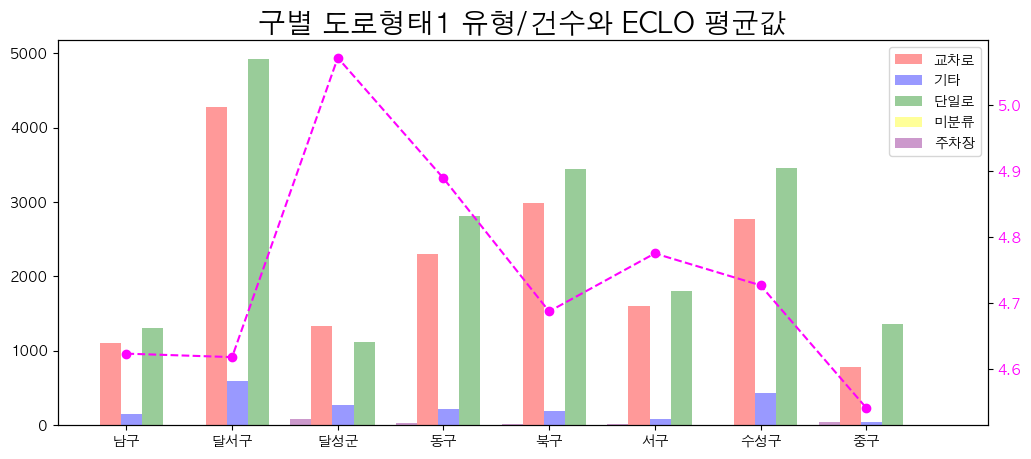

In [32]:
# 시각화

## figure setting
fig = plt.figure(figsize=(12,5))
fig.set_facecolor('white')


## bar graph
ind = np.arange(8)
gu = ('남구', '달서구', '달성군', '동구', '북구', '서구', '수성구', '중구')
bar_width = 0.2

ax1 = fig.add_subplot()
xtick_label_position = ind-0.25
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(gu)

b1 = ax1.bar(ind - 0.4, eclo_roadtype_gu['교차로'], width=bar_width, alpha=0.4, color='red', label='교차로')
b2 = ax1.bar(ind - 0.2, eclo_roadtype_gu['기타'], width=bar_width, alpha=0.4, color='blue', label='기타')
b3 = ax1.bar(ind, eclo_roadtype_gu['단일로'], width=bar_width, alpha=0.4, color='green', label='단일로')
b4 = ax1.bar(ind + 0.2, eclo_roadtype_gu['미분류'], width=bar_width, alpha=0.4, color='yellow', label='미분류')
b5 = ax1.bar(ind + 0.4, eclo_roadtype_gu['주차장'], width=bar_width, alpha=0.4, color='purple', label='주차장')

ax1.legend()


## line graph
eclo = eclo_gu['ECLO']
color = 'magenta'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position, eclo, color=color, linestyle='--', marker="o")
ax2.tick_params(axis='y', labelcolor=color)

plt.title('구별 도로형태1 유형/건수와 ECLO 평균값', fontsize=20)

plt.show()

### **B) 도로형태1와 ECLO 상관관계**

In [33]:
# 도로형태로 groupby 후, ECLO 컬럼 추출
eclo_road_tmp = train_df[['도로형태1','ECLO']]
eclo_road_tmp.head(3)

,도로형태1,ECLO
0,단일로,5
1,단일로,3
2,단일로,3


In [34]:
eclo_road_tmp2 = eclo_road_tmp.groupby('도로형태1')['ECLO'].mean()
eclo_roadtype = pd.DataFrame(eclo_road_tmp2)
eclo_roadtype.head(3)

,ECLO
도로형태1,
교차로,4.882281
기타,4.065962
단일로,4.671841


In [35]:
# 건수 컬럼 추가 
eclo_roadtype['건수'] = train_df['도로형태1'].value_counts()

In [36]:
eclo_roadtype

,ECLO,건수
도로형태1,,
교차로,4.882281,17151
기타,4.065962,1986
단일로,4.671841,20228
미분류,3.750000,8
주차장,3.716102,236


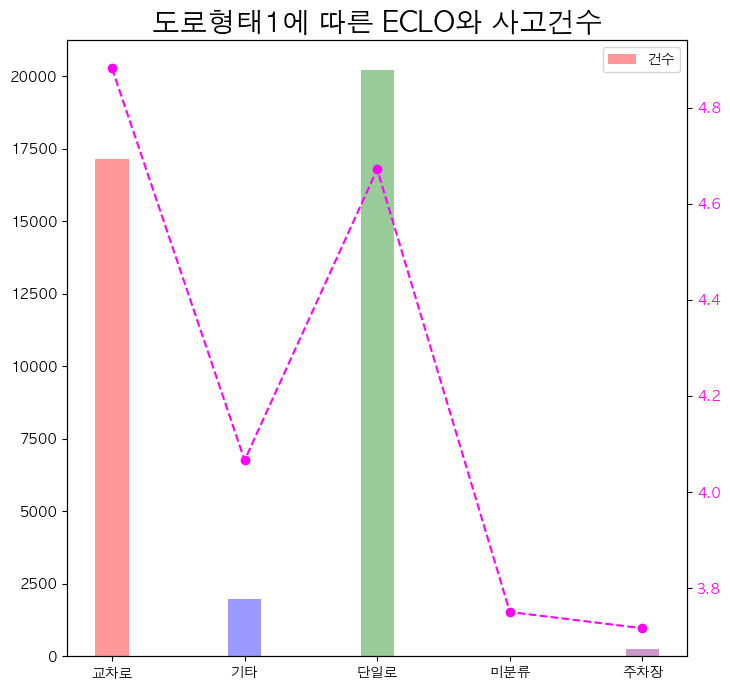

In [37]:
# 시각화

## figure setting
fig = plt.figure(figsize=(8,8))
bar_width = 0.25
fig.set_facecolor('white')

## multi-bar graph
N = 5
ind = np.arange(N)
road = ('교차로', '기타', '단일로', '미분류', '주차장')
colors = ['red', 'blue', 'green', 'yellow', 'purple']
ax1 = fig.add_subplot()
xtick_label_position = ind
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(road)
ax1.bar(ind, eclo_roadtype['건수'], bar_width, alpha=0.4, color=colors, label='건수')
ax1.legend()

## line graph
eclo = eclo_roadtype['ECLO']
color = ('magenta')
ax2 = ax1.twinx()
ax2.plot(xtick_label_position, eclo, color=color, linestyle='--', marker="o")
ax2.tick_params(axis='y', labelcolor=color)

plt.title('도로형태1에 따른 ECLO와 사고건수', fontsize=20)
plt.show()

## **2️⃣ 구,동 별 `피해운전자 연령` 분포**

'구,동 별 피해운전자 연령별 분포'와 '피해운전자 연령과 ECLO 상관관계'를 확인하여 지역별 피해운전자 특징을 파악합니다. 

- A-1) 구별 피해운전자 연령
- A-2) 동별 피해운전자 연령
- B) 피해운전자 연령과 ECLO 상관관계

### **A-1) 구별 피해운전자 연령**

#### **'피해운전자 연령' 컬럼 데이터 전처리**

[전처리 Info]
- 연령대 카테고리를 생성해서 데이터를 grouping
  - 수치화 시키기 어렵고 연령을 특정지을 수 없는 'nan' & '미분류' 데이터의 경우, 제거하고 전처리 진행
    1) 전체 데이터 (39609개) 대비 데이터 양이 적음 : 'nan' (69개) & '미분류' 데이터 (991개)
    2) 이미 결측이 있는 데이터. 결측을 대체할 수 있는 연령을 특정 지을 수 없음

<br>

[DF Info]
- `train_fin` : '피해운전자 연령' 컬럼 데이터 전처리 한 train 데이터
- `age_range_fin` : '피해운전자 연령범위' 컬럼 생성 및 기존 연령 데이터와 매칭한 데이터

In [38]:
# '피해운전자 연령' 데이터 확인
print(set(train_df['피해운전자 연령']))

{'48세', '23세', '71세', '24세', '49세', '4세', '90세 이상', '67세', '90세', '22세', '45세', '21세', '33세', '15세', '94세', nan, '81세', '35세', '78세', '65세', '50세', '6세', '13세', '34세', '55세', '20세', '38세', '44세', '30세', '56세', '37세', '70세', '88세', '84세', '11세', '14세', '18세', '17세', '83세', '27세', '16세', '3세', '41세', '92세', '42세', '52세', '64세', '29세', '51세', '86세', '8세', '40세', '25세', '12세', '39세', '43세', '82세', '10세', '73세', '80세', '74세', '61세', '47세', '89세', '5세', '28세', '76세', '58세', '7세', '26세', '98세 이상', '62세', '31세', '53세', '19세', '미분류', '91세', '36세', '93세', '63세', '46세', '60세', '72세', '9세', '77세', '54세', '75세', '59세', '57세', '85세', '69세', '32세', '68세', '2세', '87세', '66세', '79세', '1세'}


In [39]:
# '피해운전자 연령' 데이터에 'nan'&'미분류' 데이터 갯수 확인
display('nan 데이터 갯수: ', train_df[train_df['피해운전자 연령'].isnull()].count())  # 991개
display('미분류 데이터 갯수: ', train_df[train_df['피해운전자 연령']=='미분류'].count()) # 69개
# 전체 데이터 수 확인
display(train_df.info())                                                      # 전체 데이터 39609개 / 피해운전자 연령 데이터 38618개

'nan 데이터 갯수: '

ID             991
요일             991
기상상태           991
노면상태           991
사고유형           991
사고유형 - 세부분류    991
법규위반           991
가해운전자 차종       991
가해운전자 성별       991
가해운전자 연령       991
가해운전자 상해정도     991
피해운전자 차종         0
피해운전자 성별         0
피해운전자 연령         0
피해운전자 상해정도       0
사망자수           991
중상자수           991
경상자수           991
부상자수           991
ECLO           991
연              991
월              991
일              991
시간             991
도시             991
구              991
동              991
도로형태1          991
도로형태2          991
dtype: int64

'미분류 데이터 갯수: '

ID             69
요일             69
기상상태           69
노면상태           69
사고유형           69
사고유형 - 세부분류    69
법규위반           69
가해운전자 차종       69
가해운전자 성별       69
가해운전자 연령       69
가해운전자 상해정도     69
피해운전자 차종       69
피해운전자 성별       69
피해운전자 연령       69
피해운전자 상해정도     69
사망자수           69
중상자수           69
경상자수           69
부상자수           69
ECLO           69
연              69
월              69
일              69
시간             69
도시             69
구              69
동              69
도로형태1          69
도로형태2          69
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   요일           39609 non-null  object
 2   기상상태         39609 non-null  object
 3   노면상태         39609 non-null  object
 4   사고유형         39609 non-null  object
 5   사고유형 - 세부분류  39609 non-null  object
 6   법규위반         39609 non-null  object
 7   가해운전자 차종     39609 non-null  object
 8   가해운전자 성별     39609 non-null  object
 9   가해운전자 연령     39609 non-null  object
 10  가해운전자 상해정도   39609 non-null  object
 11  피해운전자 차종     38618 non-null  object
 12  피해운전자 성별     38618 non-null  object
 13  피해운전자 연령     38618 non-null  object
 14  피해운전자 상해정도   38618 non-null  object
 15  사망자수         39609 non-null  int64 
 16  중상자수         39609 non-null  int64 
 17  경상자수         39609 non-null  int64 
 18  부상자수         39609 non-null  int64 
 19  ECLO         39609 non-nu

None

In [40]:
# 'nan'&'미분류' 데이터 제거할 df 생성
train_fin = train_df.copy()
train_fin

,ID,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,...,ECLO,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,...,5,2019,1,1,0,대구광역시,중구,대신동,단일로,기타
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39세,...,3,2019,1,1,0,대구광역시,달서구,감삼동,단일로,기타
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,...,3,2019,1,1,1,대구광역시,수성구,두산동,단일로,기타
3,ACCIDENT_00003,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,49세,...,5,2019,1,1,2,대구광역시,북구,복현동,단일로,기타
4,ACCIDENT_00004,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,30세,...,3,2019,1,1,4,대구광역시,동구,신암동,단일로,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,금요일,맑음,건조,차대차,측면충돌,신호위반,승용,여,52세,...,3,2021,12,31,19,대구광역시,수성구,수성동3가,교차로,교차로안
39605,ACCIDENT_39605,금요일,맑음,건조,차대차,측면충돌,안전거리미확보,승용,여,60세,...,3,2021,12,31,19,대구광역시,달서구,상인동,단일로,기타
39606,ACCIDENT_39606,금요일,맑음,건조,차대차,측면충돌,교차로운행방법위반,승용,남,60세,...,10,2021,12,31,21,대구광역시,달서구,월성동,교차로,교차로안
39607,ACCIDENT_39607,금요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,40세,...,3,2021,12,31,22,대구광역시,달서구,장동,기타,기타


In [41]:
# 'nan' 데이터 제거
age_nan_idx = train_fin[train_fin['피해운전자 연령'].isnull()].index
train_fin.drop(age_nan_idx, inplace=True)
display('nan 데이터 갯수: ', train_fin[train_fin['피해운전자 연령'].isnull()].count())
display(train_fin.info())   

'nan 데이터 갯수: '

ID             0
요일             0
기상상태           0
노면상태           0
사고유형           0
사고유형 - 세부분류    0
법규위반           0
가해운전자 차종       0
가해운전자 성별       0
가해운전자 연령       0
가해운전자 상해정도     0
피해운전자 차종       0
피해운전자 성별       0
피해운전자 연령       0
피해운전자 상해정도     0
사망자수           0
중상자수           0
경상자수           0
부상자수           0
ECLO           0
연              0
월              0
일              0
시간             0
도시             0
구              0
동              0
도로형태1          0
도로형태2          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 38618 entries, 0 to 39608
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           38618 non-null  object
 1   요일           38618 non-null  object
 2   기상상태         38618 non-null  object
 3   노면상태         38618 non-null  object
 4   사고유형         38618 non-null  object
 5   사고유형 - 세부분류  38618 non-null  object
 6   법규위반         38618 non-null  object
 7   가해운전자 차종     38618 non-null  object
 8   가해운전자 성별     38618 non-null  object
 9   가해운전자 연령     38618 non-null  object
 10  가해운전자 상해정도   38618 non-null  object
 11  피해운전자 차종     38618 non-null  object
 12  피해운전자 성별     38618 non-null  object
 13  피해운전자 연령     38618 non-null  object
 14  피해운전자 상해정도   38618 non-null  object
 15  사망자수         38618 non-null  int64 
 16  중상자수         38618 non-null  int64 
 17  경상자수         38618 non-null  int64 
 18  부상자수         38618 non-null  int64 
 19  ECLO         38618 non-null  i

None

In [42]:
# '미분류' 데이터 제거
age_und_idx = train_fin[train_fin['피해운전자 연령']=='미분류'].index
train_fin.drop(age_und_idx, inplace=True)
display('미분류 데이터 갯수: ', train_fin[train_fin['피해운전자 연령']=='미분류'].count())
display(train_fin.info())   

'미분류 데이터 갯수: '

ID             0
요일             0
기상상태           0
노면상태           0
사고유형           0
사고유형 - 세부분류    0
법규위반           0
가해운전자 차종       0
가해운전자 성별       0
가해운전자 연령       0
가해운전자 상해정도     0
피해운전자 차종       0
피해운전자 성별       0
피해운전자 연령       0
피해운전자 상해정도     0
사망자수           0
중상자수           0
경상자수           0
부상자수           0
ECLO           0
연              0
월              0
일              0
시간             0
도시             0
구              0
동              0
도로형태1          0
도로형태2          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 38549 entries, 0 to 39608
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           38549 non-null  object
 1   요일           38549 non-null  object
 2   기상상태         38549 non-null  object
 3   노면상태         38549 non-null  object
 4   사고유형         38549 non-null  object
 5   사고유형 - 세부분류  38549 non-null  object
 6   법규위반         38549 non-null  object
 7   가해운전자 차종     38549 non-null  object
 8   가해운전자 성별     38549 non-null  object
 9   가해운전자 연령     38549 non-null  object
 10  가해운전자 상해정도   38549 non-null  object
 11  피해운전자 차종     38549 non-null  object
 12  피해운전자 성별     38549 non-null  object
 13  피해운전자 연령     38549 non-null  object
 14  피해운전자 상해정도   38549 non-null  object
 15  사망자수         38549 non-null  int64 
 16  중상자수         38549 non-null  int64 
 17  경상자수         38549 non-null  int64 
 18  부상자수         38549 non-null  int64 
 19  ECLO         38549 non-null  i

None

In [43]:
# 데이터 수치화 object -> int
tmp = train_fin['피해운전자 연령'].str.slice(start=0, stop=2)
train_fin['피해운전자 연령'] = tmp.str.replace("세", "", )
train_fin = train_fin.astype({'피해운전자 연령':'int'})
train_fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38549 entries, 0 to 39608
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           38549 non-null  object
 1   요일           38549 non-null  object
 2   기상상태         38549 non-null  object
 3   노면상태         38549 non-null  object
 4   사고유형         38549 non-null  object
 5   사고유형 - 세부분류  38549 non-null  object
 6   법규위반         38549 non-null  object
 7   가해운전자 차종     38549 non-null  object
 8   가해운전자 성별     38549 non-null  object
 9   가해운전자 연령     38549 non-null  object
 10  가해운전자 상해정도   38549 non-null  object
 11  피해운전자 차종     38549 non-null  object
 12  피해운전자 성별     38549 non-null  object
 13  피해운전자 연령     38549 non-null  int64 
 14  피해운전자 상해정도   38549 non-null  object
 15  사망자수         38549 non-null  int64 
 16  중상자수         38549 non-null  int64 
 17  경상자수         38549 non-null  int64 
 18  부상자수         38549 non-null  int64 
 19  ECLO         38549 non-null  i

In [44]:
# # '피해운전자 연령대' df 생성 / train_fin 데이터 불러온 후 매칭

## '피해운전자 연령대' df 생성
age_range_data = ['~10세 미만', '~20세 미만', '~30세 미만', '~40세 미만', 
                         '~50세 미만', '~60세 미만', '~70세 미만', '~80세 미만', '~90세 미만', '~98세 미만',
                         '98세 이상~']
age_range_df = pd.DataFrame(age_range_data, columns=['피해운전자 연령범위'])

## train_fin 데이터 추출한 df 
age_data = train_fin['피해운전자 연령']
age_data_df = pd.DataFrame(age_data)

In [45]:
## 두 df concat
age_range_tmp = pd.concat([age_range_df, age_data_df])
age_range_tmp

,피해운전자 연령범위,피해운전자 연령
0,~10세 미만,NaN
1,~20세 미만,NaN
2,~30세 미만,NaN
3,~40세 미만,NaN
4,~50세 미만,NaN
...,...,...
39604,NaN,28.0
39605,NaN,52.0
39606,NaN,73.0
39607,NaN,57.0


In [46]:
age_range_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38560 entries, 0 to 39608
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   피해운전자 연령범위  11 non-null     object 
 1   피해운전자 연령    38549 non-null  float64
dtypes: float64(1), object(1)
memory usage: 903.8+ KB


In [47]:
## 매칭

In [48]:
age_range_tmp.loc[(age_range_tmp['피해운전자 연령'] >= 1) & (age_range_tmp['피해운전자 연령'] < 10), '피해운전자 연령범위'] = '~10세 미만'

In [49]:
age_range_tmp.loc[(age_range_tmp['피해운전자 연령'] >= 10) & (age_range_tmp['피해운전자 연령'] < 20), '피해운전자 연령범위'] = '~20세 미만'

In [50]:
age_range_tmp.loc[(age_range_tmp['피해운전자 연령'] >= 20) & (age_range_tmp['피해운전자 연령'] < 30), '피해운전자 연령범위'] = '~30세 미만'

In [51]:
age_range_tmp.loc[(age_range_tmp['피해운전자 연령'] >= 30) & (age_range_tmp['피해운전자 연령'] < 40), '피해운전자 연령범위'] = '~40세 미만'

In [52]:
age_range_tmp.loc[(age_range_tmp['피해운전자 연령'] >= 40) & (age_range_tmp['피해운전자 연령'] < 50), '피해운전자 연령범위'] = '~50세 미만'

In [53]:
age_range_tmp.loc[(age_range_tmp['피해운전자 연령'] >= 50) & (age_range_tmp['피해운전자 연령'] < 60), '피해운전자 연령범위'] = '~60세 미만'

In [54]:
age_range_tmp.loc[(age_range_tmp['피해운전자 연령'] >= 60) & (age_range_tmp['피해운전자 연령'] < 70), '피해운전자 연령범위'] = '~70세 미만'

In [55]:
age_range_tmp.loc[(age_range_tmp['피해운전자 연령'] >= 70) & (age_range_tmp['피해운전자 연령'] < 80), '피해운전자 연령범위'] = '~80세 미만'

In [56]:
age_range_tmp.loc[(age_range_tmp['피해운전자 연령'] >= 80) & (age_range_tmp['피해운전자 연령'] < 90), '피해운전자 연령범위'] = '~90세 미만'

In [57]:
age_range_tmp.loc[(age_range_tmp['피해운전자 연령'] >= 90) & (age_range_tmp['피해운전자 연령'] < 98), '피해운전자 연령범위'] = '~98세 미만'

In [58]:
age_range_tmp.loc[age_range_tmp['피해운전자 연령'] >= 98, '피해운전자 연령범위'] = '98세 이상~'

In [59]:
age_range_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38560 entries, 0 to 39608
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   피해운전자 연령범위  38560 non-null  object 
 1   피해운전자 연령    38549 non-null  float64
dtypes: float64(1), object(1)
memory usage: 903.8+ KB


In [60]:
age_range_tmp.head(23)

,피해운전자 연령범위,피해운전자 연령
0,~10세 미만,NaN
1,~20세 미만,NaN
2,~30세 미만,NaN
3,~40세 미만,NaN
4,~50세 미만,NaN
5,~60세 미만,NaN
6,~70세 미만,NaN
7,~80세 미만,NaN
8,~90세 미만,NaN
9,~98세 미만,NaN


In [61]:
age_range_tmp_idx = age_range_tmp.reset_index()
age_range_tmp_idx.head(23)

,index,피해운전자 연령범위,피해운전자 연령
0,0,~10세 미만,NaN
1,1,~20세 미만,NaN
2,2,~30세 미만,NaN
3,3,~40세 미만,NaN
4,4,~50세 미만,NaN
5,5,~60세 미만,NaN
6,6,~70세 미만,NaN
7,7,~80세 미만,NaN
8,8,~90세 미만,NaN
9,9,~98세 미만,NaN


In [62]:
age_range_fin = age_range_tmp_idx.drop([0,1,2,3,4,5,6,7,8,9,10], axis=0, inplace=False)
age_range_fin.head(12)

,index,피해운전자 연령범위,피해운전자 연령
11,0,~80세 미만,70.0
12,1,~70세 미만,61.0
13,2,~40세 미만,38.0
14,3,~40세 미만,36.0
15,4,~60세 미만,52.0
16,5,~40세 미만,35.0
17,6,~80세 미만,76.0
18,7,~60세 미만,53.0
19,8,~70세 미만,62.0
20,9,~50세 미만,42.0


In [63]:
age_range_fin = age_range_fin.set_index('index', drop=True)

In [64]:
# 전처리 결과 확인
display(age_range_fin.head(12))
display(age_range_fin.info())

,피해운전자 연령범위,피해운전자 연령
index,,
0,~80세 미만,70.0
1,~70세 미만,61.0
2,~40세 미만,38.0
3,~40세 미만,36.0
4,~60세 미만,52.0
5,~40세 미만,35.0
6,~80세 미만,76.0
7,~60세 미만,53.0
8,~70세 미만,62.0


<class 'pandas.core.frame.DataFrame'>
Index: 38549 entries, 0 to 39608
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   피해운전자 연령범위  38549 non-null  object 
 1   피해운전자 연령    38549 non-null  float64
dtypes: float64(1), object(1)
memory usage: 903.5+ KB


None

#### **train_fin에 '피해운전자 연령범위' 추가**

In [65]:
train_fin['피해운전자 연령범위']=age_range_fin['피해운전자 연령범위']
train_fin[['피해운전자 연령', '피해운전자 연령범위']].head(20)

,피해운전자 연령,피해운전자 연령범위
0,70,~80세 미만
1,61,~70세 미만
2,38,~40세 미만
3,36,~40세 미만
4,52,~60세 미만
5,35,~40세 미만
6,76,~80세 미만
7,53,~60세 미만
8,62,~70세 미만
9,42,~50세 미만


#### **구별 피해운전자 연령 분포**

In [66]:
# '구','피해운전자 연령범위' groupby
age_tmp1 = train_fin.groupby('구')['피해운전자 연령범위'].value_counts()
age_tmp2 = age_tmp1.to_frame()
agerange_gu = age_tmp2.unstack()
agerange_gu.head()

count                                                          \
피해운전자 연령범위 98세 이상~ ~10세 미만 ~20세 미만 ~30세 미만 ~40세 미만 ~50세 미만 ~60세 미만 ~70세 미만   
구                                                                            
남구             1.0    26.0   101.0   459.0   441.0   449.0   450.0   367.0   
달서구            NaN   122.0   532.0  1821.0  1754.0  1724.0  1853.0  1333.0   
달성군            NaN    45.0   118.0   363.0   540.0   550.0   515.0   347.0   
동구             NaN    49.0   224.0   819.0   857.0   887.0  1056.0   812.0   
북구             NaN    85.0   307.0  1066.0  1032.0  1225.0  1373.0   880.0   

                                    
피해운전자 연령범위 ~80세 미만 ~90세 미만 ~98세 미만  
구                                   
남구           154.0    46.0     2.0  
달서구          432.0   119.0     4.0  
달성군          145.0    39.0     5.0  
동구           326.0   106.0     NaN  
북구           373.0    96.0     6.0

In [67]:
# agerange_gu 평탄화
agerange_gu_flt = agerange_gu.pipe(flat_cols)
agerange_gu_flt

,"count , 98세 이상~","count , ~10세 미만","count , ~20세 미만","count , ~30세 미만","count , ~40세 미만","count , ~50세 미만","count , ~60세 미만","count , ~70세 미만","count , ~80세 미만","count , ~90세 미만","count , ~98세 미만"
구,,,,,,,,,,,
남구,1.0,26.0,101.0,459.0,441.0,449.0,450.0,367.0,154.0,46.0,2.0
달서구,NaN,122.0,532.0,1821.0,1754.0,1724.0,1853.0,1333.0,432.0,119.0,4.0
달성군,NaN,45.0,118.0,363.0,540.0,550.0,515.0,347.0,145.0,39.0,5.0
동구,NaN,49.0,224.0,819.0,857.0,887.0,1056.0,812.0,326.0,106.0,NaN
북구,NaN,85.0,307.0,1066.0,1032.0,1225.0,1373.0,880.0,373.0,96.0,6.0
서구,NaN,23.0,104.0,496.0,537.0,567.0,792.0,605.0,227.0,59.0,4.0
수성구,NaN,74.0,319.0,1089.0,1202.0,1238.0,1342.0,885.0,307.0,91.0,6.0
중구,NaN,8.0,93.0,537.0,386.0,287.0,351.0,314.0,137.0,33.0,NaN


In [68]:
# column 명 바꿔주기 
agerange_gu_flt.columns = ['98세 이상~', '~10세 미만', '~20세 미만', '~30세 미만', '~40세 미만', 
                           '~50세 미만', '~60세 미만', '~70세 미만', '~80세 미만', '~90세 미만', '~98세 미만']
agerange_gu_flt

,98세 이상~,~10세 미만,~20세 미만,~30세 미만,~40세 미만,~50세 미만,~60세 미만,~70세 미만,~80세 미만,~90세 미만,~98세 미만
구,,,,,,,,,,,
남구,1.0,26.0,101.0,459.0,441.0,449.0,450.0,367.0,154.0,46.0,2.0
달서구,NaN,122.0,532.0,1821.0,1754.0,1724.0,1853.0,1333.0,432.0,119.0,4.0
달성군,NaN,45.0,118.0,363.0,540.0,550.0,515.0,347.0,145.0,39.0,5.0
동구,NaN,49.0,224.0,819.0,857.0,887.0,1056.0,812.0,326.0,106.0,NaN
북구,NaN,85.0,307.0,1066.0,1032.0,1225.0,1373.0,880.0,373.0,96.0,6.0
서구,NaN,23.0,104.0,496.0,537.0,567.0,792.0,605.0,227.0,59.0,4.0
수성구,NaN,74.0,319.0,1089.0,1202.0,1238.0,1342.0,885.0,307.0,91.0,6.0
중구,NaN,8.0,93.0,537.0,386.0,287.0,351.0,314.0,137.0,33.0,NaN


In [69]:
# 결측치 NaN -> 0 처리 
print('결측치 제거 전:\n', agerange_gu_flt.isna().sum())

결측치 제거 전:
 98세 이상~    7
~10세 미만    0
~20세 미만    0
~30세 미만    0
~40세 미만    0
~50세 미만    0
~60세 미만    0
~70세 미만    0
~80세 미만    0
~90세 미만    0
~98세 미만    2
dtype: int64


In [70]:
agerange_gu_flt['98세 이상~'] = agerange_gu_flt['98세 이상~'].fillna(0)
agerange_gu_flt['~98세 미만'] = agerange_gu_flt['~98세 미만'].fillna(0)
print('결측치 제거 후:\n', agerange_gu_flt.isna().sum())

결측치 제거 후:
 98세 이상~    0
~10세 미만    0
~20세 미만    0
~30세 미만    0
~40세 미만    0
~50세 미만    0
~60세 미만    0
~70세 미만    0
~80세 미만    0
~90세 미만    0
~98세 미만    0
dtype: int64


In [71]:
# 두 데이터 merge
eclo_agerange_gu = pd.merge(eclo_gu, agerange_gu_flt, on='구', how='left')
eclo_agerange_gu

,ECLO,98세 이상~,~10세 미만,~20세 미만,~30세 미만,~40세 미만,~50세 미만,~60세 미만,~70세 미만,~80세 미만,~90세 미만,~98세 미만
구,,,,,,,,,,,,
남구,4.623681,1.0,26.0,101.0,459.0,441.0,449.0,450.0,367.0,154.0,46.0,2.0
달서구,4.618441,0.0,122.0,532.0,1821.0,1754.0,1724.0,1853.0,1333.0,432.0,119.0,4.0
달성군,5.072280,0.0,45.0,118.0,363.0,540.0,550.0,515.0,347.0,145.0,39.0,5.0
동구,4.889534,0.0,49.0,224.0,819.0,857.0,887.0,1056.0,812.0,326.0,106.0,0.0
북구,4.687669,0.0,85.0,307.0,1066.0,1032.0,1225.0,1373.0,880.0,373.0,96.0,6.0
서구,4.775680,0.0,23.0,104.0,496.0,537.0,567.0,792.0,605.0,227.0,59.0,4.0
수성구,4.727300,0.0,74.0,319.0,1089.0,1202.0,1238.0,1342.0,885.0,307.0,91.0,6.0
중구,4.541610,0.0,8.0,93.0,537.0,386.0,287.0,351.0,314.0,137.0,33.0,0.0


**시각화 분석**

- 구별 연령대 분포

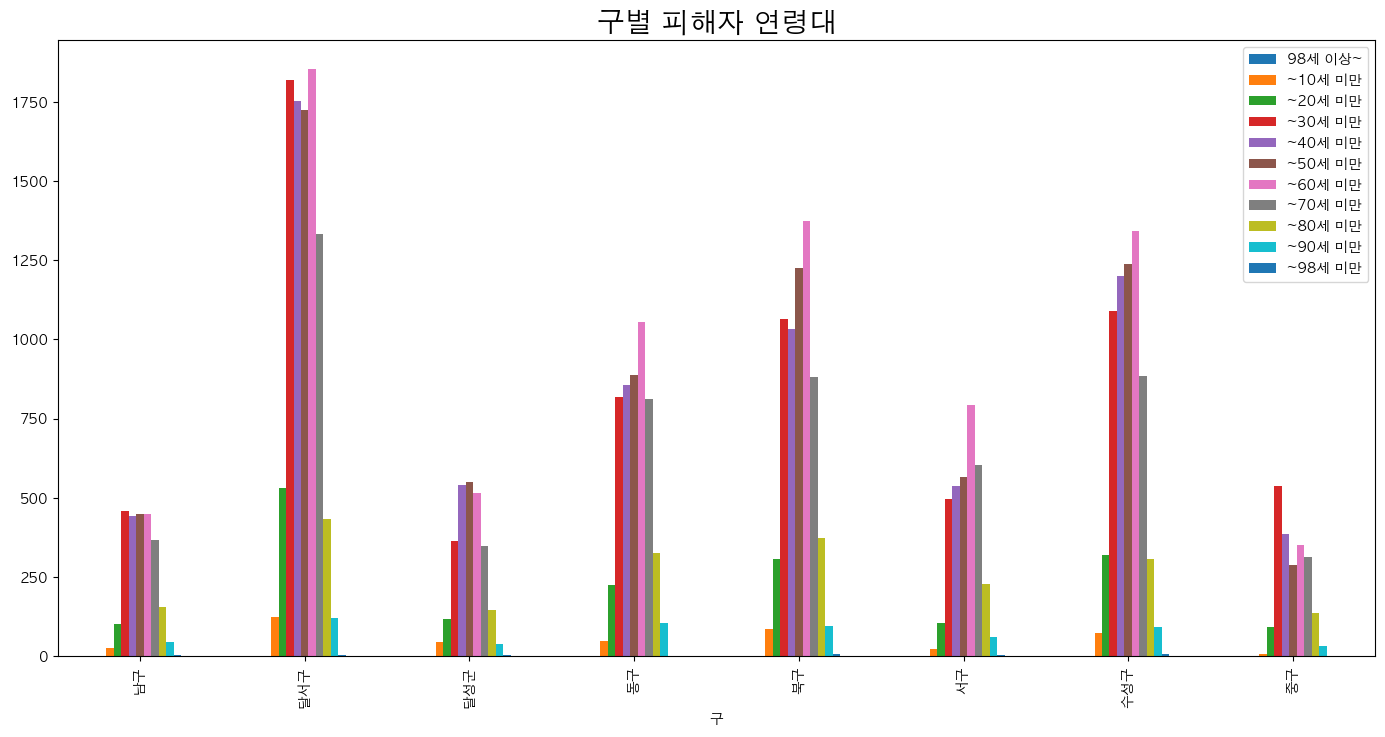

In [72]:
agerange_gu_flt.plot(kind='bar')
plt.title('구별 피해자 연령대', fontsize=20)
plt.show()

In [73]:
# 달서구, 동구, 북구, 수성구 - 

- 구별 연령대 분포 + ECLO 평균값

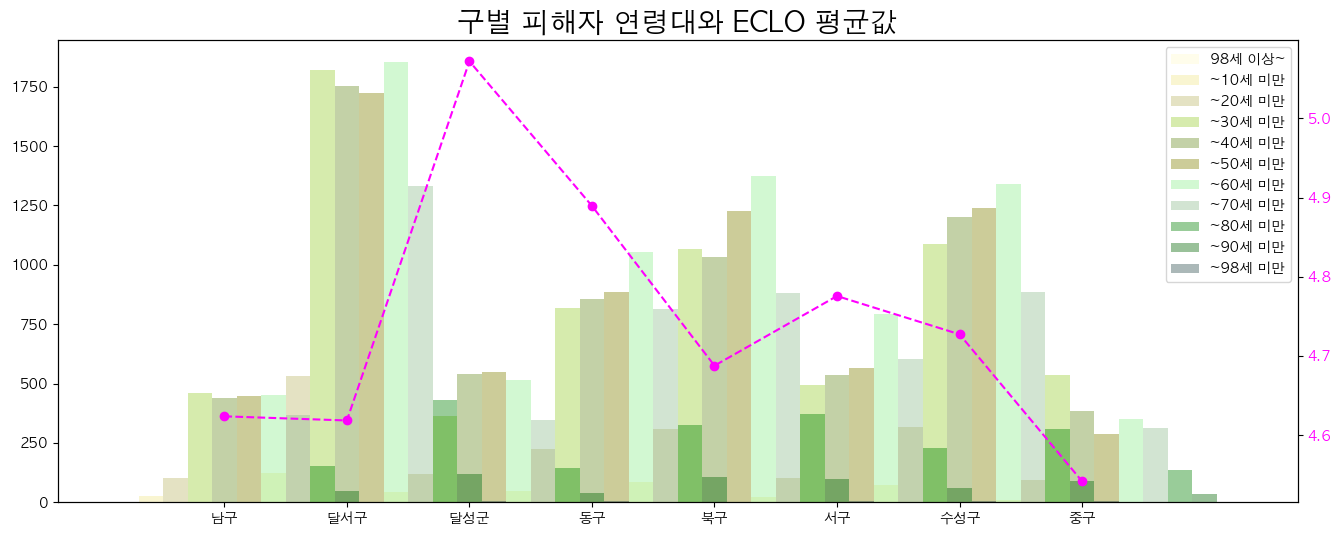

In [74]:
# figure setting
fig = plt.figure(figsize=(16,6))
fig.set_facecolor('white')


# bar graph
ind = np.arange(8)
gu = ('남구', '달서구', '달성군', '동구', '북구', '서구', '수성구', '중구')
bar_width = 0.2

ax1 = fig.add_subplot()
xtick_label_position = ind
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(gu)

b1 = ax1.bar(ind - 0.8, eclo_agerange_gu['98세 이상~'], width=bar_width, alpha=0.4, color='lemonchiffon', label='98세 이상~')
b2 = ax1.bar(ind - 0.6, eclo_agerange_gu['~10세 미만'], width=bar_width, alpha=0.4, color='khaki', label='~10세 미만')
b3 = ax1.bar(ind - 0.4, eclo_agerange_gu['~20세 미만'], width=bar_width, alpha=0.4, color='darkkhaki', label='~20세 미만')
b4 = ax1.bar(ind - 0.2, eclo_agerange_gu['~30세 미만'], width=bar_width, alpha=0.4, color='yellowgreen', label='~30세 미만')
b5 = ax1.bar(ind, eclo_agerange_gu['~40세 미만'], width=bar_width, alpha=0.4, color='olivedrab', label='~40세 미만')
b6 = ax1.bar(ind + 0.2, eclo_agerange_gu['~50세 미만'], width=bar_width, alpha=0.4, color='olive', label='~50세 미만')
b7 = ax1.bar(ind + 0.4, eclo_agerange_gu['~60세 미만'], width=bar_width, alpha=0.4, color='lightgreen', label='~60세 미만')
b8 = ax1.bar(ind + 0.6, eclo_agerange_gu['~70세 미만'], width=bar_width, alpha=0.4, color='darkseagreen', label='~70세 미만')
b9 = ax1.bar(ind + 0.8, eclo_agerange_gu['~80세 미만'], width=bar_width, alpha=0.4, color='green', label='~80세 미만')
b10 = ax1.bar(ind + 1, eclo_agerange_gu['~90세 미만'], width=bar_width, alpha=0.4, color='darkgreen', label='~90세 미만')
b11 = ax1.bar(ind + 1.2, eclo_agerange_gu['~98세 미만'], width=bar_width, alpha=0.4, color='darkslategray', label='~98세 미만')


ax1.legend()


# line graph
eclo = eclo_gu['ECLO']
color = 'magenta'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position, eclo, color=color, linestyle='--', marker="o")
ax2.tick_params(axis='y', labelcolor=color)

plt.title('구별 피해자 연령대와 ECLO 평균값', fontsize=20)

plt.show()

In [75]:
# 달성군과 동구의 도로 상황 -> 따로 사고에 대한 다른 피처들로 시각화분석 
# 달서구, 북구, 수성구 -> 아파트 밀집촌 (도로도 잘 되어있고, 차량통제도 잘 되어있음, 경상 사고가 많이)

### **B) 피해운전자 연령과 ECLO 상관관계**

In [76]:
train_fin.columns

Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '연',
       '월', '일', '시간', '도시', '구', '동', '도로형태1', '도로형태2', '피해운전자 연령범위'],
      dtype='object')

In [77]:
# 피해운전자 연령범위로 groupby 후, ECLO 컬럼 추출
eclo_agerange_tmp = train_fin[['피해운전자 연령범위', 'ECLO']]
eclo_agerange_tmp.head(3)

,피해운전자 연령범위,ECLO
0,~80세 미만,5
1,~70세 미만,3
2,~40세 미만,3


In [78]:
eclo_agerange_tmp2 = eclo_agerange_tmp.groupby('피해운전자 연령범위')['ECLO'].mean()
eclo_agerange = pd.DataFrame(eclo_agerange_tmp2)
eclo_agerange.head(3)

,ECLO
피해운전자 연령범위,
98세 이상~,1.000000
~10세 미만,3.530093
~20세 미만,4.284761


In [79]:
# 건수 컬럼 추가 
eclo_agerange['건수'] = train_fin['피해운전자 연령범위'].value_counts()
eclo_agerange.head(3)

,ECLO,건수
피해운전자 연령범위,,
98세 이상~,1.000000,1
~10세 미만,3.530093,432
~20세 미만,4.284761,1798


**시각화**

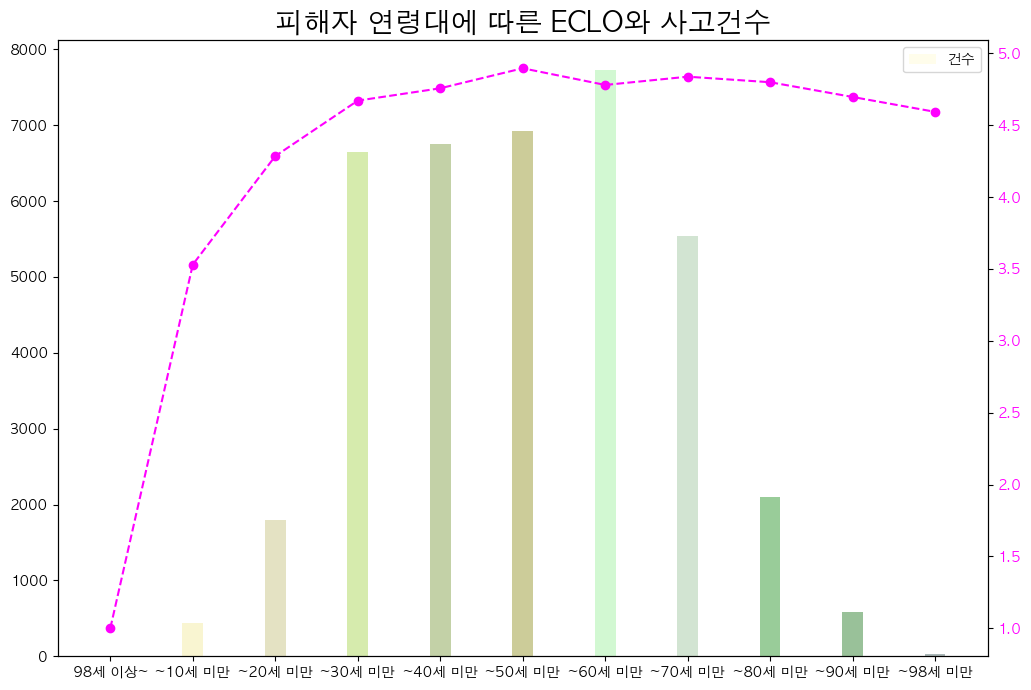

In [80]:
# figure setting
fig = plt.figure(figsize=(12,8))
bar_width = 0.25
fig.set_facecolor('white')

# bar graph
N = 11
ind = np.arange(N)
age = ('98세 이상~', '~10세 미만', '~20세 미만', '~30세 미만', '~40세 미만',
       '~50세 미만', '~60세 미만', '~70세 미만', '~80세 미만', '~90세 미만', '~98세 미만')
colors = ['lemonchiffon', 'khaki', 'darkkhaki', 'yellowgreen',
          'olivedrab', 'olive', 'lightgreen', 'darkseagreen', 'green', 'darkgreen', 'darkslategray']
ax1 = fig.add_subplot()
xtick_label_position = ind
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(age)
ax1.bar(ind, eclo_agerange['건수'], bar_width, alpha=0.4, color=colors, label='건수')
ax1.legend()

# line graph
eclo = eclo_agerange['ECLO']
color = ('magenta')
ax2 = ax1.twinx()
ax2.plot(xtick_label_position, eclo, color=color, linestyle='--', marker="o")
ax2.tick_params(axis='y', labelcolor=color)

plt.title('피해자 연령대에 따른 ECLO와 사고건수', fontsize=20)
plt.show()

## **3️⃣ 구,동 별 `가해운전자 연령` 분포**

'구,동 별 가해운전자 연령별 분포'와 '가해운전자 연령과 ECLO 상관관계'를 확인하여 지역별 가해운전자 특징을 파악합니다. 

- A-1) 구별 가해운전자 연령
- A-2) 동별 가해운전자 연령
- B) 가해운전자 연령과 ECLO 상관관계

### **A-1) 구별 가해운전자 연령**

#### **'가해운전자 연령' 컬럼 데이터 전처리**

[전처리 Info]
- 연령대 카테고리를 생성해서 데이터를 grouping
  - 수치화 시키기 어렵고 연령을 특정지을 수 없는 '미분류' 데이터의 경우, 제거하고 전처리 진행
    1) 전체 데이터 (39609개) 대비 데이터 양이 적음 : '미분류' 데이터 (994개)
    2) 대체할 수 있는 연령을 특정 지을 수 없음

<br>

[DF Info]
- `train_off_fin_` : '가해운전자 연령' 컬럼 데이터 전처리 한 train 데이터
- `agerange_off_fin` : '피해운전자 연령범위' 컬럼 생성 및 기존 연령 데이터와 매칭한 데이터

In [81]:
# '가해운전자 연령' 데이터 확인
print(set(train_df['가해운전자 연령']))

{'48세', '23세', '49세', '24세', '71세', '4세', '90세 이상', '67세', '90세', '22세', '45세', '21세', '33세', '15세', '81세', '35세', '78세', '65세', '50세', '13세', '34세', '55세', '20세', '38세', '44세', '30세', '56세', '37세', '70세', '88세', '84세', '11세', '14세', '18세', '17세', '83세', '27세', '16세', '41세', '42세', '52세', '64세', '29세', '51세', '86세', '8세', '40세', '25세', '12세', '39세', '43세', '82세', '10세', '73세', '80세', '74세', '61세', '47세', '89세', '5세', '28세', '76세', '58세', '7세', '26세', '98세 이상', '62세', '53세', '31세', '19세', '미분류', '36세', '63세', '46세', '60세', '72세', '9세', '77세', '54세', '75세', '59세', '85세', '57세', '69세', '32세', '68세', '87세', '66세', '79세'}


In [82]:
# '가해운전자 연령' 데이터에 '미분류' 데이터 갯수 확인
display('미분류 데이터 갯수: ', train_df[train_df['가해운전자 연령']=='미분류'].count()) # 994개
# 전체 데이터 수 확인
display(train_df.info())                                                       # 전체 데이터 39609개 / 가해운전자 연령 데이터 39609개

'미분류 데이터 갯수: '

ID             994
요일             994
기상상태           994
노면상태           994
사고유형           994
사고유형 - 세부분류    994
법규위반           994
가해운전자 차종       994
가해운전자 성별       994
가해운전자 연령       994
가해운전자 상해정도     994
피해운전자 차종       987
피해운전자 성별       987
피해운전자 연령       987
피해운전자 상해정도     987
사망자수           994
중상자수           994
경상자수           994
부상자수           994
ECLO           994
연              994
월              994
일              994
시간             994
도시             994
구              994
동              994
도로형태1          994
도로형태2          994
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   요일           39609 non-null  object
 2   기상상태         39609 non-null  object
 3   노면상태         39609 non-null  object
 4   사고유형         39609 non-null  object
 5   사고유형 - 세부분류  39609 non-null  object
 6   법규위반         39609 non-null  object
 7   가해운전자 차종     39609 non-null  object
 8   가해운전자 성별     39609 non-null  object
 9   가해운전자 연령     39609 non-null  object
 10  가해운전자 상해정도   39609 non-null  object
 11  피해운전자 차종     38618 non-null  object
 12  피해운전자 성별     38618 non-null  object
 13  피해운전자 연령     38618 non-null  object
 14  피해운전자 상해정도   38618 non-null  object
 15  사망자수         39609 non-null  int64 
 16  중상자수         39609 non-null  int64 
 17  경상자수         39609 non-null  int64 
 18  부상자수         39609 non-null  int64 
 19  ECLO         39609 non-nu

None

In [83]:
# '미분류' 데이터 제거할 df 생성
train_off_fin = train_df.copy()
train_off_fin

,ID,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,...,ECLO,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,...,5,2019,1,1,0,대구광역시,중구,대신동,단일로,기타
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39세,...,3,2019,1,1,0,대구광역시,달서구,감삼동,단일로,기타
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,...,3,2019,1,1,1,대구광역시,수성구,두산동,단일로,기타
3,ACCIDENT_00003,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,49세,...,5,2019,1,1,2,대구광역시,북구,복현동,단일로,기타
4,ACCIDENT_00004,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,30세,...,3,2019,1,1,4,대구광역시,동구,신암동,단일로,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,금요일,맑음,건조,차대차,측면충돌,신호위반,승용,여,52세,...,3,2021,12,31,19,대구광역시,수성구,수성동3가,교차로,교차로안
39605,ACCIDENT_39605,금요일,맑음,건조,차대차,측면충돌,안전거리미확보,승용,여,60세,...,3,2021,12,31,19,대구광역시,달서구,상인동,단일로,기타
39606,ACCIDENT_39606,금요일,맑음,건조,차대차,측면충돌,교차로운행방법위반,승용,남,60세,...,10,2021,12,31,21,대구광역시,달서구,월성동,교차로,교차로안
39607,ACCIDENT_39607,금요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,40세,...,3,2021,12,31,22,대구광역시,달서구,장동,기타,기타


In [84]:
# '미분류' 데이터 제거
off_und_idx = train_off_fin[train_off_fin['가해운전자 연령']=='미분류'].index
train_off_fin.drop(off_und_idx, inplace=True)
display('미분류 데이터 갯수: ', train_off_fin[train_off_fin['가해운전자 연령']=='미분류'].count())
display(train_off_fin.info())   

'미분류 데이터 갯수: '

ID             0
요일             0
기상상태           0
노면상태           0
사고유형           0
사고유형 - 세부분류    0
법규위반           0
가해운전자 차종       0
가해운전자 성별       0
가해운전자 연령       0
가해운전자 상해정도     0
피해운전자 차종       0
피해운전자 성별       0
피해운전자 연령       0
피해운전자 상해정도     0
사망자수           0
중상자수           0
경상자수           0
부상자수           0
ECLO           0
연              0
월              0
일              0
시간             0
도시             0
구              0
동              0
도로형태1          0
도로형태2          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 38615 entries, 0 to 39608
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           38615 non-null  object
 1   요일           38615 non-null  object
 2   기상상태         38615 non-null  object
 3   노면상태         38615 non-null  object
 4   사고유형         38615 non-null  object
 5   사고유형 - 세부분류  38615 non-null  object
 6   법규위반         38615 non-null  object
 7   가해운전자 차종     38615 non-null  object
 8   가해운전자 성별     38615 non-null  object
 9   가해운전자 연령     38615 non-null  object
 10  가해운전자 상해정도   38615 non-null  object
 11  피해운전자 차종     37631 non-null  object
 12  피해운전자 성별     37631 non-null  object
 13  피해운전자 연령     37631 non-null  object
 14  피해운전자 상해정도   37631 non-null  object
 15  사망자수         38615 non-null  int64 
 16  중상자수         38615 non-null  int64 
 17  경상자수         38615 non-null  int64 
 18  부상자수         38615 non-null  int64 
 19  ECLO         38615 non-null  i

None

In [85]:
train_off_fin['가해운전자 연령'].unique()

array(['51세', '39세', '70세', '49세', '30세', '52세', '61세', '68세', '66세',
       '62세', '56세', '64세', '46세', '74세', '28세', '72세', '33세', '27세',
       '50세', '19세', '41세', '54세', '76세', '35세', '25세', '60세', '85세',
       '20세', '21세', '67세', '59세', '40세', '65세', '47세', '48세', '43세',
       '58세', '31세', '44세', '53세', '32세', '37세', '22세', '24세', '34세',
       '26세', '75세', '23세', '38세', '18세', '45세', '36세', '57세', '71세',
       '69세', '29세', '17세', '42세', '88세', '79세', '55세', '63세', '78세',
       '73세', '89세', '16세', '10세', '80세', '13세', '82세', '14세', '86세',
       '83세', '77세', '84세', '15세', '81세', '11세', '9세', '87세', '4세', '8세',
       '12세', '90세 이상', '7세', '98세 이상', '90세', '5세'], dtype=object)

In [86]:
# 데이터 수치화 object -> int
tmp = train_off_fin['가해운전자 연령'].str.slice(start=0, stop=2)
train_off_fin['가해운전자 연령'] = tmp.str.replace("세", "", )
train_off_fin = train_off_fin.astype({'가해운전자 연령':'int'})
train_off_fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38615 entries, 0 to 39608
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           38615 non-null  object
 1   요일           38615 non-null  object
 2   기상상태         38615 non-null  object
 3   노면상태         38615 non-null  object
 4   사고유형         38615 non-null  object
 5   사고유형 - 세부분류  38615 non-null  object
 6   법규위반         38615 non-null  object
 7   가해운전자 차종     38615 non-null  object
 8   가해운전자 성별     38615 non-null  object
 9   가해운전자 연령     38615 non-null  int64 
 10  가해운전자 상해정도   38615 non-null  object
 11  피해운전자 차종     37631 non-null  object
 12  피해운전자 성별     37631 non-null  object
 13  피해운전자 연령     37631 non-null  object
 14  피해운전자 상해정도   37631 non-null  object
 15  사망자수         38615 non-null  int64 
 16  중상자수         38615 non-null  int64 
 17  경상자수         38615 non-null  int64 
 18  부상자수         38615 non-null  int64 
 19  ECLO         38615 non-null  i

In [87]:
# '가해운전자 연령대' df 생성 / train_off_fin 내 전처리 한 '가해운전자 연령' 불러온 후 매칭

## '가해운전자 연령대' df 생성
agerange_off_data = ['~10세 미만', '~20세 미만', '~30세 미만', '~40세 미만', 
                         '~50세 미만', '~60세 미만', '~70세 미만', '~80세 미만', '~90세 미만', '~98세 미만',
                         '98세 이상~']
agerange_off_df = pd.DataFrame(agerange_off_data, columns=['가해운전자 연령범위'])

## train_off_fin 데이터 추출한 df 
age_off_data = train_off_fin['가해운전자 연령']
age_off_data_df = pd.DataFrame(age_off_data)

In [88]:
## 두 df concat
agerange_off_tmp = pd.concat([agerange_off_df, age_off_data_df])
agerange_off_tmp

,가해운전자 연령범위,가해운전자 연령
0,~10세 미만,NaN
1,~20세 미만,NaN
2,~30세 미만,NaN
3,~40세 미만,NaN
4,~50세 미만,NaN
...,...,...
39604,NaN,52.0
39605,NaN,60.0
39606,NaN,60.0
39607,NaN,40.0


In [89]:
agerange_off_tmp.info() # 초기 연령대 범위 세팅값 11개가 추가되어있는 상태 (38615 -> 38626)

<class 'pandas.core.frame.DataFrame'>
Index: 38626 entries, 0 to 39608
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가해운전자 연령범위  11 non-null     object 
 1   가해운전자 연령    38615 non-null  float64
dtypes: float64(1), object(1)
memory usage: 905.3+ KB


In [90]:
## 매칭

In [91]:
agerange_off_tmp.loc[(agerange_off_tmp['가해운전자 연령'] >= 1) & (agerange_off_tmp['가해운전자 연령'] < 10), '가해운전자 연령범위'] = '~10세 미만'

In [92]:
agerange_off_tmp.loc[(agerange_off_tmp['가해운전자 연령'] >= 10) & (agerange_off_tmp['가해운전자 연령'] < 20), '가해운전자 연령범위'] = '~20세 미만'

In [93]:
agerange_off_tmp.loc[(agerange_off_tmp['가해운전자 연령'] >= 20) & (agerange_off_tmp['가해운전자 연령'] < 30), '가해운전자 연령범위'] = '~30세 미만'

In [94]:
agerange_off_tmp.loc[(agerange_off_tmp['가해운전자 연령'] >= 30) & (agerange_off_tmp['가해운전자 연령'] < 40), '가해운전자 연령범위'] = '~40세 미만'

In [95]:
agerange_off_tmp.loc[(agerange_off_tmp['가해운전자 연령'] >= 40) & (agerange_off_tmp['가해운전자 연령'] < 50), '가해운전자 연령범위'] = '~50세 미만'

In [96]:
agerange_off_tmp.loc[(agerange_off_tmp['가해운전자 연령'] >= 50) & (agerange_off_tmp['가해운전자 연령'] < 60), '가해운전자 연령범위'] = '~60세 미만'

In [97]:
agerange_off_tmp.loc[(agerange_off_tmp['가해운전자 연령'] >= 60) & (agerange_off_tmp['가해운전자 연령'] < 70), '가해운전자 연령범위'] = '~70세 미만'

In [98]:
agerange_off_tmp.loc[(agerange_off_tmp['가해운전자 연령'] >= 70) & (agerange_off_tmp['가해운전자 연령'] < 80), '가해운전자 연령범위'] = '~80세 미만'

In [99]:
agerange_off_tmp.loc[(agerange_off_tmp['가해운전자 연령'] >= 80) & (agerange_off_tmp['가해운전자 연령'] < 90), '가해운전자 연령범위'] = '~90세 미만'

In [100]:
agerange_off_tmp.loc[(agerange_off_tmp['가해운전자 연령'] >= 90) & (agerange_off_tmp['가해운전자 연령'] < 98), '가해운전자 연령범위'] = '~98세 미만'

In [101]:
agerange_off_tmp.loc[agerange_off_tmp['가해운전자 연령'] >= 98, '가해운전자 연령범위'] = '98세 이상~'

In [102]:
agerange_off_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38626 entries, 0 to 39608
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가해운전자 연령범위  38626 non-null  object 
 1   가해운전자 연령    38615 non-null  float64
dtypes: float64(1), object(1)
memory usage: 905.3+ KB


In [103]:
agerange_off_tmp.head(23)

,가해운전자 연령범위,가해운전자 연령
0,~10세 미만,NaN
1,~20세 미만,NaN
2,~30세 미만,NaN
3,~40세 미만,NaN
4,~50세 미만,NaN
5,~60세 미만,NaN
6,~70세 미만,NaN
7,~80세 미만,NaN
8,~90세 미만,NaN
9,~98세 미만,NaN


In [104]:
agerange_off_tmp_idx = agerange_off_tmp.reset_index()
agerange_off_tmp_idx.head(23)

,index,가해운전자 연령범위,가해운전자 연령
0,0,~10세 미만,NaN
1,1,~20세 미만,NaN
2,2,~30세 미만,NaN
3,3,~40세 미만,NaN
4,4,~50세 미만,NaN
5,5,~60세 미만,NaN
6,6,~70세 미만,NaN
7,7,~80세 미만,NaN
8,8,~90세 미만,NaN
9,9,~98세 미만,NaN


In [105]:
agerange_off_fin = agerange_off_tmp_idx.drop([0,1,2,3,4,5,6,7,8,9,10], axis=0, inplace=False)
agerange_off_fin = agerange_off_fin.set_index('index', drop=True)

In [106]:
# 전처리 결과 확인
display(agerange_off_fin.head(12))
display(agerange_off_fin.info())

,가해운전자 연령범위,가해운전자 연령
index,,
0,~60세 미만,51.0
1,~40세 미만,39.0
2,~80세 미만,70.0
3,~50세 미만,49.0
4,~40세 미만,30.0
5,~60세 미만,52.0
6,~70세 미만,61.0
7,~70세 미만,68.0
8,~50세 미만,49.0


<class 'pandas.core.frame.DataFrame'>
Index: 38615 entries, 0 to 39608
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가해운전자 연령범위  38615 non-null  object 
 1   가해운전자 연령    38615 non-null  float64
dtypes: float64(1), object(1)
memory usage: 905.0+ KB


None

#### **train_off_fin에 '가해운전자 연령범위' 추가**

In [107]:
train_off_fin['가해운전자 연령범위']=agerange_off_fin['가해운전자 연령범위']
train_off_fin[['가해운전자 연령', '가해운전자 연령범위']].head(20)

,가해운전자 연령,가해운전자 연령범위
0,51,~60세 미만
1,39,~40세 미만
2,70,~80세 미만
3,49,~50세 미만
4,30,~40세 미만
5,52,~60세 미만
6,61,~70세 미만
7,68,~70세 미만
8,49,~50세 미만
9,66,~70세 미만


#### **구별 가해운전자 연령 분포**

In [108]:
# '구','가해운전자 연령범위' groupby
age_off_tmp1 = train_off_fin.groupby('구')['가해운전자 연령범위'].value_counts()
age_off_tmp2 = age_off_tmp1.to_frame()
agerange_off_gu = age_off_tmp2.unstack()
agerange_off_gu.head()

count                                                          \
가해운전자 연령범위 98세 이상~ ~10세 미만 ~20세 미만 ~30세 미만 ~40세 미만 ~50세 미만 ~60세 미만 ~70세 미만   
구                                                                            
남구             NaN     1.0    69.0   368.0   407.0   408.0   501.0   491.0   
달서구            NaN     8.0   378.0  1381.0  1467.0  1760.0  2303.0  1793.0   
달성군            NaN     3.0    96.0   357.0   452.0   473.0   619.0   515.0   
동구             NaN     2.0   147.0   668.0   715.0   822.0  1256.0  1067.0   
북구             1.0     8.0   227.0   901.0   895.0  1167.0  1609.0  1160.0   

                                    
가해운전자 연령범위 ~80세 미만 ~90세 미만 ~98세 미만  
구                                   
남구           201.0    35.0     2.0  
달서구          540.0    61.0     NaN  
달성군          167.0    30.0     NaN  
동구           427.0    83.0     NaN  
북구           438.0    77.0     NaN

In [109]:
# agerange_off_gu 평탄화
agerange_off_gu_flt = agerange_off_gu.pipe(flat_cols)
agerange_off_gu_flt

,"count , 98세 이상~","count , ~10세 미만","count , ~20세 미만","count , ~30세 미만","count , ~40세 미만","count , ~50세 미만","count , ~60세 미만","count , ~70세 미만","count , ~80세 미만","count , ~90세 미만","count , ~98세 미만"
구,,,,,,,,,,,
남구,NaN,1.0,69.0,368.0,407.0,408.0,501.0,491.0,201.0,35.0,2.0
달서구,NaN,8.0,378.0,1381.0,1467.0,1760.0,2303.0,1793.0,540.0,61.0,NaN
달성군,NaN,3.0,96.0,357.0,452.0,473.0,619.0,515.0,167.0,30.0,NaN
동구,NaN,2.0,147.0,668.0,715.0,822.0,1256.0,1067.0,427.0,83.0,NaN
북구,1.0,8.0,227.0,901.0,895.0,1167.0,1609.0,1160.0,438.0,77.0,NaN
서구,NaN,4.0,88.0,457.0,396.0,551.0,862.0,745.0,269.0,37.0,NaN
수성구,NaN,3.0,152.0,936.0,984.0,1293.0,1461.0,1167.0,453.0,79.0,1.0
중구,NaN,1.0,69.0,441.0,295.0,278.0,443.0,422.0,142.0,30.0,NaN


In [110]:
# column 명 바꿔주기 
agerange_off_gu_flt.columns = ['98세 이상~', '~10세 미만', '~20세 미만', '~30세 미만', '~40세 미만', 
                           '~50세 미만', '~60세 미만', '~70세 미만', '~80세 미만', '~90세 미만', '~98세 미만']
agerange_off_gu_flt

,98세 이상~,~10세 미만,~20세 미만,~30세 미만,~40세 미만,~50세 미만,~60세 미만,~70세 미만,~80세 미만,~90세 미만,~98세 미만
구,,,,,,,,,,,
남구,NaN,1.0,69.0,368.0,407.0,408.0,501.0,491.0,201.0,35.0,2.0
달서구,NaN,8.0,378.0,1381.0,1467.0,1760.0,2303.0,1793.0,540.0,61.0,NaN
달성군,NaN,3.0,96.0,357.0,452.0,473.0,619.0,515.0,167.0,30.0,NaN
동구,NaN,2.0,147.0,668.0,715.0,822.0,1256.0,1067.0,427.0,83.0,NaN
북구,1.0,8.0,227.0,901.0,895.0,1167.0,1609.0,1160.0,438.0,77.0,NaN
서구,NaN,4.0,88.0,457.0,396.0,551.0,862.0,745.0,269.0,37.0,NaN
수성구,NaN,3.0,152.0,936.0,984.0,1293.0,1461.0,1167.0,453.0,79.0,1.0
중구,NaN,1.0,69.0,441.0,295.0,278.0,443.0,422.0,142.0,30.0,NaN


In [111]:
# 결측치 NaN -> 0 처리 
print('결측치 제거 전:\n', agerange_off_gu_flt.isna().sum())

결측치 제거 전:
 98세 이상~    7
~10세 미만    0
~20세 미만    0
~30세 미만    0
~40세 미만    0
~50세 미만    0
~60세 미만    0
~70세 미만    0
~80세 미만    0
~90세 미만    0
~98세 미만    6
dtype: int64


In [112]:
agerange_off_gu_flt['98세 이상~'] = agerange_off_gu_flt['98세 이상~'].fillna(0)
agerange_off_gu_flt['~98세 미만'] = agerange_off_gu_flt['~98세 미만'].fillna(0)
print('결측치 제거 후:\n', agerange_off_gu_flt.isna().sum())

결측치 제거 후:
 98세 이상~    0
~10세 미만    0
~20세 미만    0
~30세 미만    0
~40세 미만    0
~50세 미만    0
~60세 미만    0
~70세 미만    0
~80세 미만    0
~90세 미만    0
~98세 미만    0
dtype: int64


In [113]:
# 두 데이터 merge
eclo_agerange_off_gu = pd.merge(eclo_gu, agerange_off_gu_flt, on='구', how='left')
eclo_agerange_off_gu

,ECLO,98세 이상~,~10세 미만,~20세 미만,~30세 미만,~40세 미만,~50세 미만,~60세 미만,~70세 미만,~80세 미만,~90세 미만,~98세 미만
구,,,,,,,,,,,,
남구,4.623681,0.0,1.0,69.0,368.0,407.0,408.0,501.0,491.0,201.0,35.0,2.0
달서구,4.618441,0.0,8.0,378.0,1381.0,1467.0,1760.0,2303.0,1793.0,540.0,61.0,0.0
달성군,5.072280,0.0,3.0,96.0,357.0,452.0,473.0,619.0,515.0,167.0,30.0,0.0
동구,4.889534,0.0,2.0,147.0,668.0,715.0,822.0,1256.0,1067.0,427.0,83.0,0.0
북구,4.687669,1.0,8.0,227.0,901.0,895.0,1167.0,1609.0,1160.0,438.0,77.0,0.0
서구,4.775680,0.0,4.0,88.0,457.0,396.0,551.0,862.0,745.0,269.0,37.0,0.0
수성구,4.727300,0.0,3.0,152.0,936.0,984.0,1293.0,1461.0,1167.0,453.0,79.0,1.0
중구,4.541610,0.0,1.0,69.0,441.0,295.0,278.0,443.0,422.0,142.0,30.0,0.0


**시각화 분석**

* 구별 연령대 분포

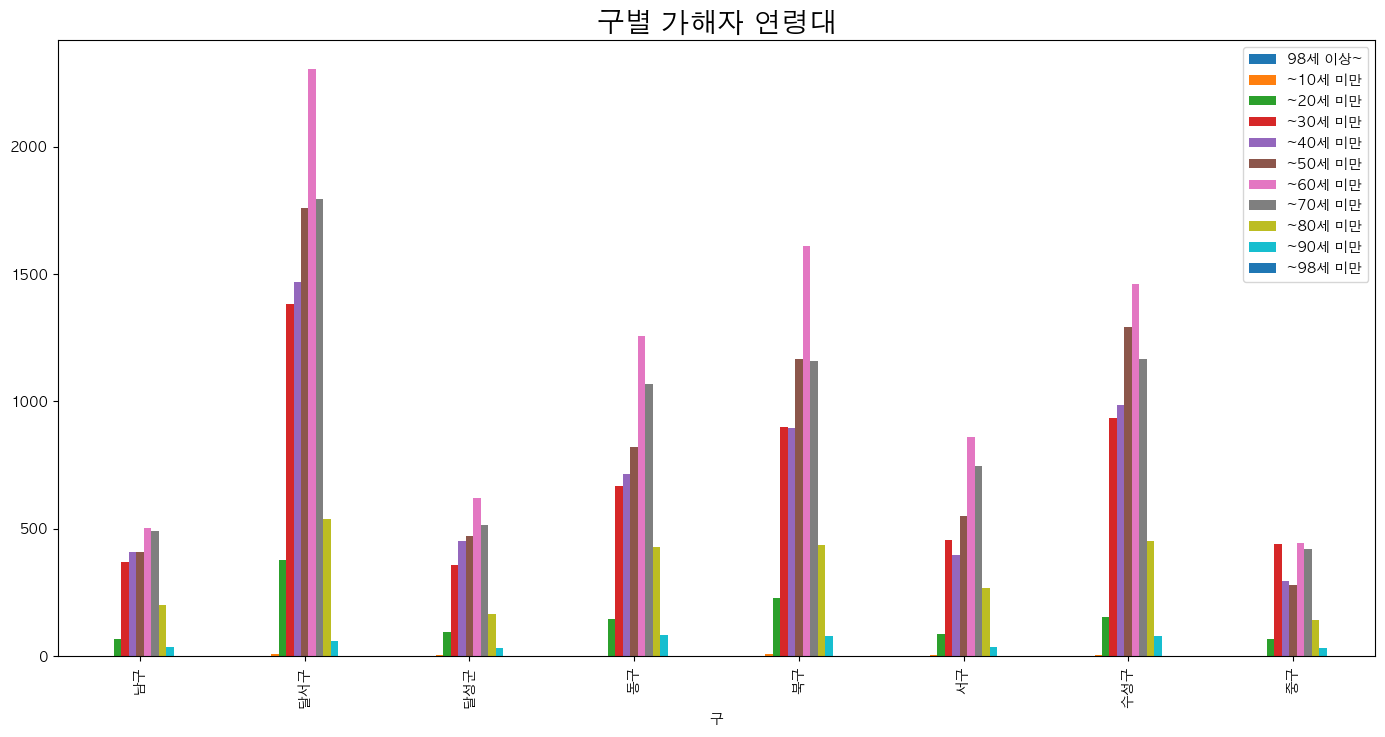

In [114]:
agerange_off_gu_flt.plot(kind='bar')
plt.title('구별 가해자 연령대', fontsize=20)
plt.show()

- 구별 연령대 분포 + ECLO 평균값

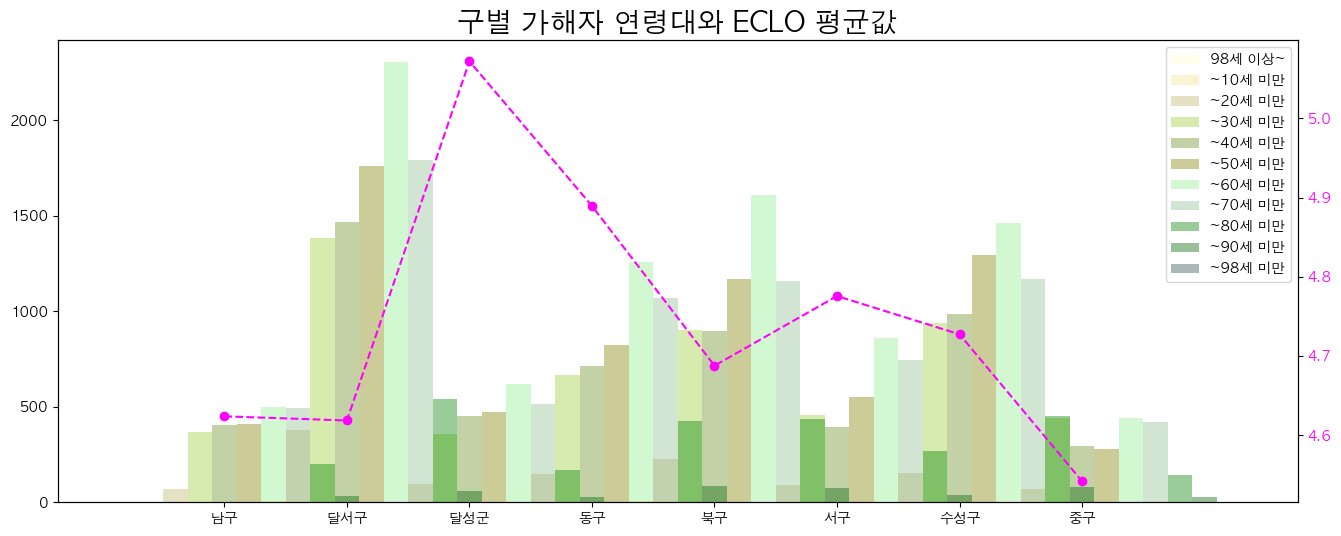

In [115]:
# figure setting
fig = plt.figure(figsize=(16,6))
fig.set_facecolor('white')


# bar graph
ind = np.arange(8)
gu = ('남구', '달서구', '달성군', '동구', '북구', '서구', '수성구', '중구')
bar_width = 0.2

ax1 = fig.add_subplot()
xtick_label_position = ind
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(gu)

b1 = ax1.bar(ind - 0.8, eclo_agerange_off_gu['98세 이상~'], width=bar_width, alpha=0.4, color='lemonchiffon', label='98세 이상~')
b2 = ax1.bar(ind - 0.6, eclo_agerange_off_gu['~10세 미만'], width=bar_width, alpha=0.4, color='khaki', label='~10세 미만')
b3 = ax1.bar(ind - 0.4, eclo_agerange_off_gu['~20세 미만'], width=bar_width, alpha=0.4, color='darkkhaki', label='~20세 미만')
b4 = ax1.bar(ind - 0.2, eclo_agerange_off_gu['~30세 미만'], width=bar_width, alpha=0.4, color='yellowgreen', label='~30세 미만')
b5 = ax1.bar(ind, eclo_agerange_off_gu['~40세 미만'], width=bar_width, alpha=0.4, color='olivedrab', label='~40세 미만')
b6 = ax1.bar(ind + 0.2, eclo_agerange_off_gu['~50세 미만'], width=bar_width, alpha=0.4, color='olive', label='~50세 미만')
b7 = ax1.bar(ind + 0.4, eclo_agerange_off_gu['~60세 미만'], width=bar_width, alpha=0.4, color='lightgreen', label='~60세 미만')
b8 = ax1.bar(ind + 0.6, eclo_agerange_off_gu['~70세 미만'], width=bar_width, alpha=0.4, color='darkseagreen', label='~70세 미만')
b9 = ax1.bar(ind + 0.8, eclo_agerange_off_gu['~80세 미만'], width=bar_width, alpha=0.4, color='green', label='~80세 미만')
b10 = ax1.bar(ind + 1, eclo_agerange_off_gu['~90세 미만'], width=bar_width, alpha=0.4, color='darkgreen', label='~90세 미만')
b11 = ax1.bar(ind + 1.2, eclo_agerange_off_gu['~98세 미만'], width=bar_width, alpha=0.4, color='darkslategray', label='~98세 미만')


ax1.legend()


# line graph
eclo = eclo_gu['ECLO']
color = 'magenta'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position, eclo, color=color, linestyle='--', marker="o")
ax2.tick_params(axis='y', labelcolor=color)

plt.title('구별 가해자 연령대와 ECLO 평균값', fontsize=20)

plt.show()

### **B) 가해운전자 연령과 ECLO 상관관계**

In [116]:
train_off_fin.columns

Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '연',
       '월', '일', '시간', '도시', '구', '동', '도로형태1', '도로형태2', '가해운전자 연령범위'],
      dtype='object')

In [117]:
# 가해운전자 연령범위로 groupby 후, ECLO 컬럼 추출
eclo_agerange_off_tmp = train_off_fin[['가해운전자 연령범위', 'ECLO']]
eclo_agerange_off_tmp.head(3)

,가해운전자 연령범위,ECLO
0,~60세 미만,5
1,~40세 미만,3
2,~80세 미만,3


In [118]:
eclo_agerange_off_tmp2 = eclo_agerange_off_tmp.groupby('가해운전자 연령범위')['ECLO'].mean()
eclo_agerange_off = pd.DataFrame(eclo_agerange_off_tmp2)
eclo_agerange_off.head(3)

,ECLO
가해운전자 연령범위,
98세 이상~,15.000000
~10세 미만,2.533333
~20세 미만,4.539152


In [119]:
# 건수 컬럼 추가 
eclo_agerange_off['건수'] = train_off_fin['가해운전자 연령범위'].value_counts()
eclo_agerange_off.head(3)

,ECLO,건수
가해운전자 연령범위,,
98세 이상~,15.000000,1
~10세 미만,2.533333,30
~20세 미만,4.539152,1226


**시각화**

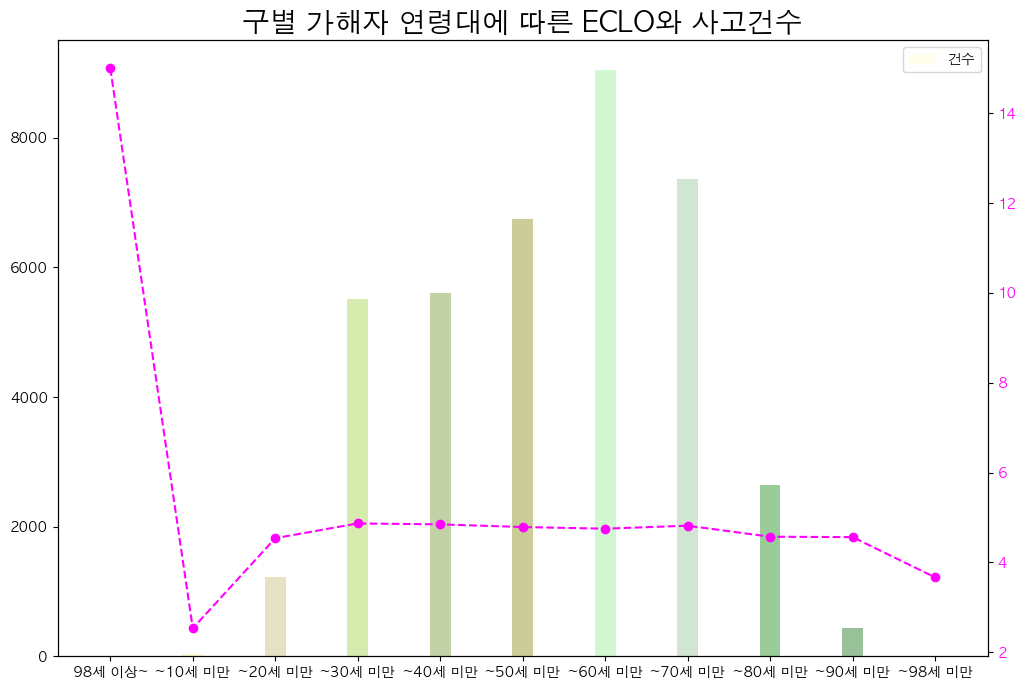

In [120]:
# figure setting
fig = plt.figure(figsize=(12,8))
bar_width = 0.25
fig.set_facecolor('white')

# bar graph
N = 11
ind = np.arange(N)
age = ('98세 이상~', '~10세 미만', '~20세 미만', '~30세 미만', '~40세 미만',
       '~50세 미만', '~60세 미만', '~70세 미만', '~80세 미만', '~90세 미만', '~98세 미만')
colors = ['lemonchiffon', 'khaki', 'darkkhaki', 'yellowgreen',
          'olivedrab', 'olive', 'lightgreen', 'darkseagreen', 'green', 'darkgreen', 'darkslategray']
ax1 = fig.add_subplot()
xtick_label_position = ind
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(age)
ax1.bar(ind, eclo_agerange_off['건수'], bar_width, alpha=0.4, color=colors, label='건수')
ax1.legend()

# line graph
eclo = eclo_agerange_off['ECLO']
color = ('magenta')
ax2 = ax1.twinx()
ax2.plot(xtick_label_position, eclo, color=color, linestyle='--', marker="o")
ax2.tick_params(axis='y', labelcolor=color)

plt.title('구별 가해자 연령대에 따른 ECLO와 사고건수', fontsize=20)
plt.show()

## **4️⃣ 구,동 별 `요일별 ECLO` 분포**

In [121]:
eclo_weekday = train_df.groupby(['요일','구'])['ECLO'].mean().reset_index()
display(eclo_weekday.head())
display(eclo_weekday['구'].unique())

,요일,구,ECLO
0,금요일,남구,4.453333
1,금요일,달서구,4.582951
2,금요일,달성군,4.967391
3,금요일,동구,4.804213
4,금요일,북구,4.502361


array(['남구', '달서구', '달성군', '동구', '북구', '서구', '수성구', '중구'], dtype=object)

**시각화**

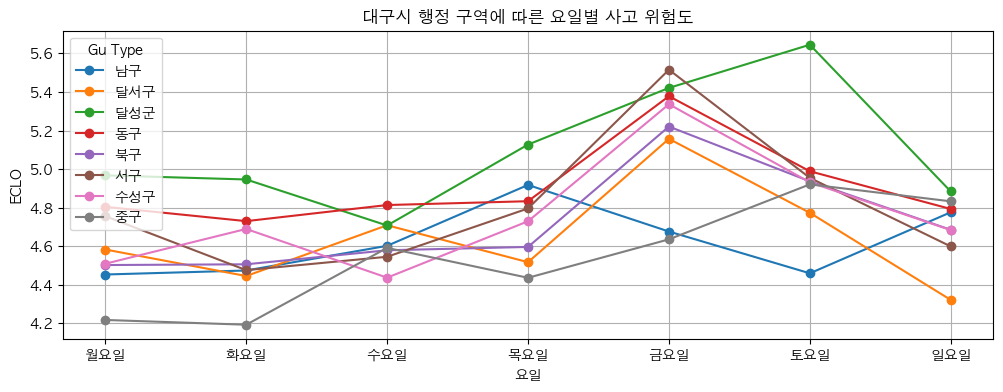

In [122]:
plt.figure(figsize=(12, 4))

for gu_name in eclo_weekday['구'].unique():
    subset = eclo_weekday[eclo_weekday['구'] == gu_name]
    plt.plot(subset['요일'], subset['ECLO'], marker='o', label=gu_name)

plt.xticks(ticks=range(7), labels=['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])
plt.xlabel('요일')
plt.ylabel('ECLO')
plt.title('대구시 행정 구역에 따른 요일별 사고 위험도')
plt.legend(title='Gu Type')
plt.grid(True)
plt.show()

## **5️⃣ 구별 사고수/ECLO평균/사망자 수**

### ECLO 평균값 컬럼 추가

In [123]:
eclo_gu

,ECLO
구,
남구,4.623681
달서구,4.618441
달성군,5.072280
동구,4.889534
북구,4.687669
서구,4.775680
수성구,4.727300
중구,4.541610


### 사고수 컬럼 추가

In [124]:
gu_counts = train_df['구'].value_counts()

In [125]:
print(gu_counts)

구
달서구    9891
수성구    6707
북구     6650
동구     5341
서구     3495
달성군    2767
남구     2559
중구     2199
Name: count, dtype: int64


In [126]:
eclo_gu['사고건수'] = gu_counts

In [127]:
eclo_gu

,ECLO,사고건수
구,,
남구,4.623681,2559
달서구,4.618441,9891
달성군,5.072280,2767
동구,4.889534,5341
북구,4.687669,6650
서구,4.775680,3495
수성구,4.727300,6707
중구,4.541610,2199


### 사망자수 컬럼 추가

#### 사망자수 컬럼 데이터 전처리
- 사망자수 컬럼은 [0, 1, 2] 데이터로 구성되어 있음
- 유의미한 사망자수를 세기 위해 `[1]` 에 해당되는 데이터와 + `[2]`는 `[2*값]` 으로 환산해서 = `[1]` 에 포함시키기

In [128]:
gu_loss = train_df.groupby('구')['사망자수'].value_counts()

In [129]:
tmp_loss = gu_loss.to_frame()
tmp2_loss = tmp_loss.unstack()
tmp2_loss.head()

count           
사망자수       0     1    2
구                      
남구    2545.0  14.0  NaN
달서구   9845.0  45.0  1.0
달성군   2712.0  52.0  3.0
동구    5289.0  50.0  2.0
북구    6595.0  55.0  NaN

In [130]:
def flat_cols(df):
    df.columns = [' , '.join(map(str, x)) for x in df.columns.to_flat_index()]
    return df

tmp2_loss_flt = tmp2_loss.pipe(flat_cols)
tmp2_loss_flt

,"count , 0","count , 1","count , 2"
구,,,
남구,2545.0,14.0,NaN
달서구,9845.0,45.0,1.0
달성군,2712.0,52.0,3.0
동구,5289.0,50.0,2.0
북구,6595.0,55.0,NaN
서구,3470.0,24.0,1.0
수성구,6679.0,27.0,1.0
중구,2174.0,25.0,NaN


In [131]:
tmp2_loss_flt.columns = ['0명', '1명', '2명']
tmp2_loss_flt

,0명,1명,2명
구,,,
남구,2545.0,14.0,NaN
달서구,9845.0,45.0,1.0
달성군,2712.0,52.0,3.0
동구,5289.0,50.0,2.0
북구,6595.0,55.0,NaN
서구,3470.0,24.0,1.0
수성구,6679.0,27.0,1.0
중구,2174.0,25.0,NaN


In [132]:
# 결측치 NaN -> 0 처리 
print('결측치 제거 전:\n', tmp2_loss_flt.isna().sum())

결측치 제거 전:
 0명    0
1명    0
2명    3
dtype: int64


In [133]:
tmp2_loss_flt['2명'] = tmp2_loss_flt['2명'].fillna(0)
print('결측치 제거 후:\n', tmp2_loss_flt.isna().sum())

결측치 제거 후:
 0명    0
1명    0
2명    0
dtype: int64


In [134]:
loss_1_2 = tmp2_loss_flt.drop(columns = ['0명'])
loss_1_2

,1명,2명
구,,
남구,14.0,0.0
달서구,45.0,1.0
달성군,52.0,3.0
동구,50.0,2.0
북구,55.0,0.0
서구,24.0,1.0
수성구,27.0,1.0
중구,25.0,0.0


In [135]:
loss_2 = loss_1_2['2명']*2
loss_2

구
남구     0.0
달서구    2.0
달성군    6.0
동구     4.0
북구     0.0
서구     2.0
수성구    2.0
중구     0.0
Name: 2명, dtype: float64

In [136]:
loss_data = loss_1_2['1명'] + loss_2
loss_data

구
남구     14.0
달서구    47.0
달성군    58.0
동구     54.0
북구     55.0
서구     26.0
수성구    29.0
중구     25.0
dtype: float64

#### eclo_gu 데이터에 병합

In [137]:
eclo_gu['사망자수'] = loss_data
eclo_gu

,ECLO,사고건수,사망자수
구,,,
남구,4.623681,2559,14.0
달서구,4.618441,9891,47.0
달성군,5.072280,2767,58.0
동구,4.889534,5341,54.0
북구,4.687669,6650,55.0
서구,4.775680,3495,26.0
수성구,4.727300,6707,29.0
중구,4.541610,2199,25.0


### 시각화

In [195]:
eclo_gu

,ECLO,사고건수,사망자수
구,,,
남구,4.623681,2559,14.0
달서구,4.618441,9891,47.0
달성군,5.072280,2767,58.0
동구,4.889534,5341,54.0
북구,4.687669,6650,55.0
서구,4.775680,3495,26.0
수성구,4.727300,6707,29.0
중구,4.541610,2199,25.0


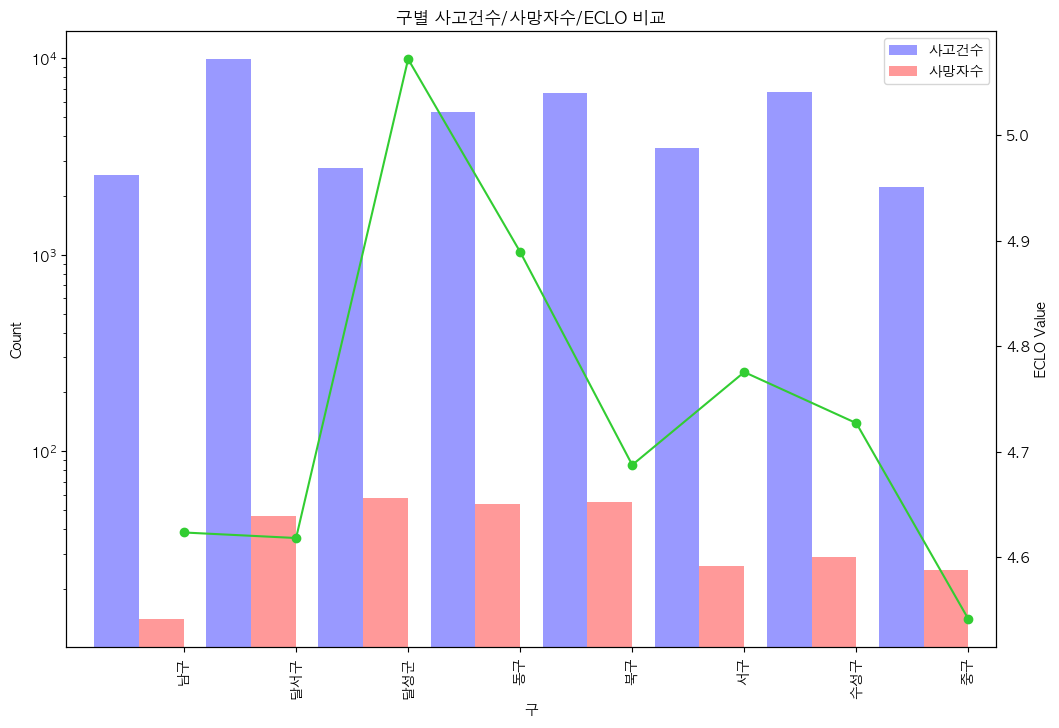

In [185]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar graph
eclo_gu[['사고건수', '사망자수']].plot(kind='bar', ax=ax1, width=0.8, alpha=0.4, position=1, color=['blue', 'red'])
ax1.set_ylabel('Count')
ax1.set_xlabel('구')
ax1.set_yscale('log') # 사망자수 값이 너무 작아 안보여서 스케일 적용 
ax1.set_title('구별 사고건수/사망자수/ECLO 비교')

# Line Graph
ax2 = ax1.twinx()
eclo_gu['ECLO'].plot(kind='line', marker='o', color='limegreen', linewidth=1.5, ax=ax2)
ax2.set_ylabel('ECLO Value')

# Show the plot
plt.show()

In [197]:
# 사고건수가 많은 순
case_sorted = eclo_gu.sort_values(by='사고건수', ascending=False)
case_sorted

,ECLO,사고건수,사망자수
구,,,
달서구,4.618441,9891,47.0
수성구,4.727300,6707,29.0
북구,4.687669,6650,55.0
동구,4.889534,5341,54.0
서구,4.775680,3495,26.0
달성군,5.072280,2767,58.0
남구,4.623681,2559,14.0
중구,4.541610,2199,25.0


In [198]:
# 사망자수가 많은 순
loss_sorted = eclo_gu.sort_values(by='사망자수', ascending=False)
loss_sorted

,ECLO,사고건수,사망자수
구,,,
달성군,5.072280,2767,58.0
북구,4.687669,6650,55.0
동구,4.889534,5341,54.0
달서구,4.618441,9891,47.0
수성구,4.727300,6707,29.0
서구,4.775680,3495,26.0
중구,4.541610,2199,25.0
남구,4.623681,2559,14.0


## **6️⃣ 구별 사고수/ECLO평균/중상자 수**

#### 중상자수 컬럼 데이터 전처리
- 중상자수 컬럼은 [0, 1, 2, 3, 4, 5, 6] 데이터로 구성되어 있음
- 유의미한 사망자수를 세기 위해 `[1]` 에 해당되는 데이터와 + `[2]`는 `[2*값]` 으로 환산 (3,4,5,6 모두 같은 로직 적용)

In [199]:
gu_severe = train_df.groupby('구')['중상자수'].value_counts()
gu_severe

구    중상자수
남구   0       1995
     1        513
     2         44
     3          5
     4          2
달서구  0       7702
     1       2037
     2        131
     3         16
     4          5
달성군  0       1982
     1        710
     2         63
     3          9
     4          2
     6          1
동구   0       4045
     1       1189
     2         88
     3         13
     4          6
북구   0       4927
     1       1594
     2        102
     3         22
     4          3
     5          2
서구   0       2617
     1        799
     2         58
     3         17
     4          3
     5          1
수성구  0       5184
     1       1389
     2        116
     3         11
     4          6
     5          1
중구   0       1684
     1        493
     2         16
     3          5
     4          1
Name: count, dtype: int64

In [200]:
tmp_severe = gu_severe.to_frame()
tmp2_severe = tmp_severe.unstack()

tmp2_severe_flt = tmp2_severe.pipe(flat_cols)

tmp2_severe_flt.columns = ['0명', '1명', '2명', '3명', '4명', '5명', '6명']
tmp2_severe_flt

,0명,1명,2명,3명,4명,5명,6명
구,,,,,,,
남구,1995.0,513.0,44.0,5.0,2.0,NaN,NaN
달서구,7702.0,2037.0,131.0,16.0,5.0,NaN,NaN
달성군,1982.0,710.0,63.0,9.0,2.0,NaN,1.0
동구,4045.0,1189.0,88.0,13.0,6.0,NaN,NaN
북구,4927.0,1594.0,102.0,22.0,3.0,2.0,NaN
서구,2617.0,799.0,58.0,17.0,3.0,1.0,NaN
수성구,5184.0,1389.0,116.0,11.0,6.0,1.0,NaN
중구,1684.0,493.0,16.0,5.0,1.0,NaN,NaN


In [202]:
tmp2_severe_flt['5명'] = tmp2_severe_flt['5명'].fillna(0)
tmp2_severe_flt['6명'] = tmp2_severe_flt['6명'].fillna(0)
tmp2_severe_flt

,0명,1명,2명,3명,4명,5명,6명
구,,,,,,,
남구,1995.0,513.0,44.0,5.0,2.0,0.0,0.0
달서구,7702.0,2037.0,131.0,16.0,5.0,0.0,0.0
달성군,1982.0,710.0,63.0,9.0,2.0,0.0,1.0
동구,4045.0,1189.0,88.0,13.0,6.0,0.0,0.0
북구,4927.0,1594.0,102.0,22.0,3.0,2.0,0.0
서구,2617.0,799.0,58.0,17.0,3.0,1.0,0.0
수성구,5184.0,1389.0,116.0,11.0,6.0,1.0,0.0
중구,1684.0,493.0,16.0,5.0,1.0,0.0,0.0


In [203]:
severe_drop = tmp2_severe_flt.drop(columns = ['0명'])
severe_drop

,1명,2명,3명,4명,5명,6명
구,,,,,,
남구,513.0,44.0,5.0,2.0,0.0,0.0
달서구,2037.0,131.0,16.0,5.0,0.0,0.0
달성군,710.0,63.0,9.0,2.0,0.0,1.0
동구,1189.0,88.0,13.0,6.0,0.0,0.0
북구,1594.0,102.0,22.0,3.0,2.0,0.0
서구,799.0,58.0,17.0,3.0,1.0,0.0
수성구,1389.0,116.0,11.0,6.0,1.0,0.0
중구,493.0,16.0,5.0,1.0,0.0,0.0


In [204]:
severe_2 = severe_drop['2명']*2
severe_3 = severe_drop['3명']*3
severe_4 = severe_drop['4명']*4
severe_5 = severe_drop['5명']*5
severe_6 = severe_drop['6명']*6
print(severe_2)
print(severe_3)
print(severe_4)
print(severe_5)
print(severe_6)

구
남구      88.0
달서구    262.0
달성군    126.0
동구     176.0
북구     204.0
서구     116.0
수성구    232.0
중구      32.0
Name: 2명, dtype: float64
구
남구     15.0
달서구    48.0
달성군    27.0
동구     39.0
북구     66.0
서구     51.0
수성구    33.0
중구     15.0
Name: 3명, dtype: float64
구
남구      8.0
달서구    20.0
달성군     8.0
동구     24.0
북구     12.0
서구     12.0
수성구    24.0
중구      4.0
Name: 4명, dtype: float64
구
남구      0.0
달서구     0.0
달성군     0.0
동구      0.0
북구     10.0
서구      5.0
수성구     5.0
중구      0.0
Name: 5명, dtype: float64
구
남구     0.0
달서구    0.0
달성군    6.0
동구     0.0
북구     0.0
서구     0.0
수성구    0.0
중구     0.0
Name: 6명, dtype: float64


In [205]:
severe_data = severe_drop['1명'] + severe_2 + severe_3 + severe_4 + severe_5 + severe_6
severe_data

구
남구      624.0
달서구    2367.0
달성군     877.0
동구     1428.0
북구     1886.0
서구      983.0
수성구    1683.0
중구      544.0
dtype: float64

#### eclo_gu 데이터에 병합

In [206]:
eclo_gu['중상자수'] = severe_data
eclo_gu

,ECLO,사고건수,사망자수,중상자수
구,,,,
남구,4.623681,2559,14.0,624.0
달서구,4.618441,9891,47.0,2367.0
달성군,5.072280,2767,58.0,877.0
동구,4.889534,5341,54.0,1428.0
북구,4.687669,6650,55.0,1886.0
서구,4.775680,3495,26.0,983.0
수성구,4.727300,6707,29.0,1683.0
중구,4.541610,2199,25.0,544.0


### 시각화

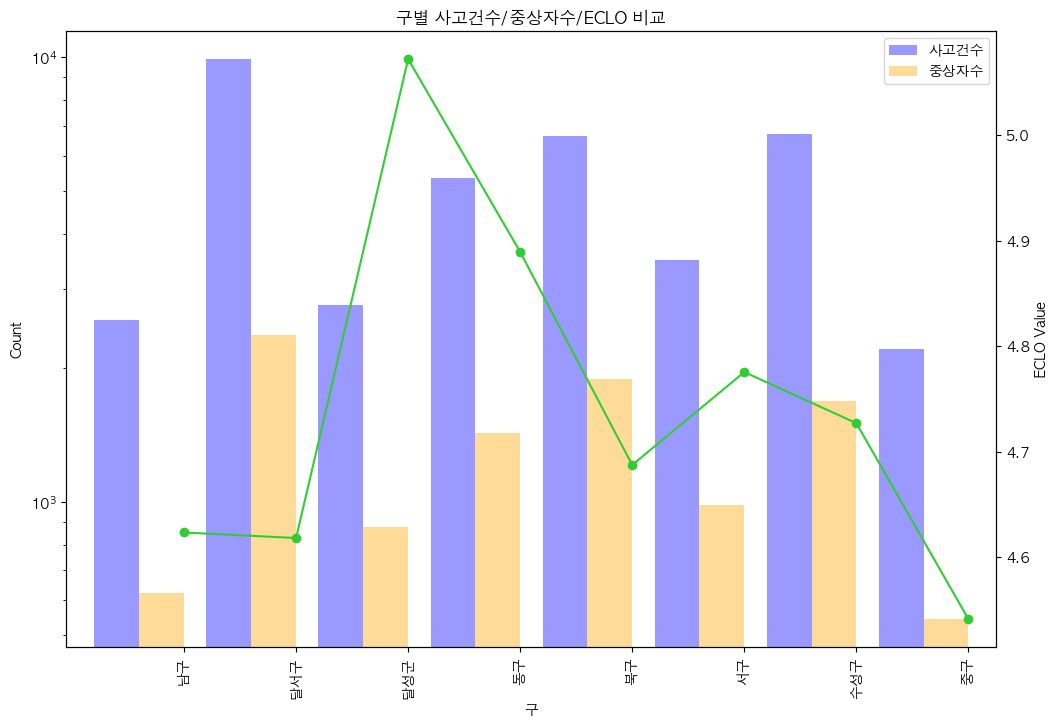

In [208]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar graph
eclo_gu[['사고건수', '중상자수']].plot(kind='bar', ax=ax1, width=0.8, alpha=0.4, position=1, color=['blue', 'orange'])
ax1.set_ylabel('Count')
ax1.set_xlabel('구')
ax1.set_yscale('log') # 중상자수 값이 너무 작아 안보여서 스케일 적용 
ax1.set_title('구별 사고건수/중상자수/ECLO 비교')

# Line Graph
ax2 = ax1.twinx()
eclo_gu['ECLO'].plot(kind='line', marker='o', color='limegreen', linewidth=1.5, ax=ax2)
ax2.set_ylabel('ECLO Value')

# Show the plot
plt.show()

In [209]:
# 사망자수가 많은 순
severe_sorted = eclo_gu.sort_values(by='중상자수', ascending=False)
severe_sorted

,ECLO,사고건수,사망자수,중상자수
구,,,,
달서구,4.618441,9891,47.0,2367.0
북구,4.687669,6650,55.0,1886.0
수성구,4.727300,6707,29.0,1683.0
동구,4.889534,5341,54.0,1428.0
서구,4.775680,3495,26.0,983.0
달성군,5.072280,2767,58.0,877.0
남구,4.623681,2559,14.0,624.0
중구,4.541610,2199,25.0,544.0
